# Seattle AirBNB Data Analysis

We will be going through AirBNB Data for Seattle to draw some Valuable Insights through House Renting Data and further down will try to create model to predict best possible Rent Price for Good Revenue.

So Let's Go -

## Step 1 - Importing Libraries and Dataset

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [188]:
calender = pd.read_csv('calendar.csv')
calender.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [189]:
listings = pd.read_csv('listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [190]:
reviews = pd.read_csv('reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


Let's Analyze datatypes of all Dataframes and see if any changes required

Calender Data

In [191]:
calender.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [192]:
calender['price'] = calender['price'].str.replace(',', '')
calender['price'] = calender['price'].str.replace('$', '')
calender['price'] = calender['price'].astype(float)

In [193]:
calender = calender.astype({'date': 'datetime64'})

In [194]:
calender.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [195]:
calender

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


Reviews Data

In [196]:
reviews.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [197]:
reviews = reviews.astype({'date': 'datetime64'})

In [198]:
reviews.dtypes

listing_id                int64
id                        int64
date             datetime64[ns]
reviewer_id               int64
reviewer_name            object
comments                 object
dtype: object

In [199]:
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del..."
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si..."


Listings Data

In [200]:
listings.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object

In [201]:
listings.describe

<bound method NDFrame.describe of             id                            listing_url       scrape_id  \
0       241032    https://www.airbnb.com/rooms/241032  20160104002432   
1       953595    https://www.airbnb.com/rooms/953595  20160104002432   
2      3308979   https://www.airbnb.com/rooms/3308979  20160104002432   
3      7421966   https://www.airbnb.com/rooms/7421966  20160104002432   
4       278830    https://www.airbnb.com/rooms/278830  20160104002432   
...        ...                                    ...             ...   
3813   8101950   https://www.airbnb.com/rooms/8101950  20160104002432   
3814   8902327   https://www.airbnb.com/rooms/8902327  20160104002432   
3815  10267360  https://www.airbnb.com/rooms/10267360  20160104002432   
3816   9604740   https://www.airbnb.com/rooms/9604740  20160104002432   
3817  10208623  https://www.airbnb.com/rooms/10208623  20160104002432   

     last_scraped                                 name  \
0      2016-01-04         Styli

Let us Look first at columns which have Constant Value or Empty (No Value) and omit them

In [202]:
listings.columns[listings.nunique() == 1]

Index(['scrape_id', 'last_scraped', 'experiences_offered', 'market',
       'country_code', 'country', 'has_availability', 'calendar_last_scraped',
       'requires_license', 'jurisdiction_names'],
      dtype='object')

In [203]:
listings[['scrape_id', 'last_scraped', 'experiences_offered', 'market',
       'country_code', 'country', 'has_availability', 'calendar_last_scraped',
       'requires_license', 'jurisdiction_names']]

,scrape_id,last_scraped,experiences_offered,market,country_code,country,has_availability,calendar_last_scraped,requires_license,jurisdiction_names
0,20160104002432,2016-01-04,none,Seattle,US,United States,t,2016-01-04,f,WASHINGTON
1,20160104002432,2016-01-04,none,Seattle,US,United States,t,2016-01-04,f,WASHINGTON
2,20160104002432,2016-01-04,none,Seattle,US,United States,t,2016-01-04,f,WASHINGTON
3,20160104002432,2016-01-04,none,Seattle,US,United States,t,2016-01-04,f,WASHINGTON
4,20160104002432,2016-01-04,none,Seattle,US,United States,t,2016-01-04,f,WASHINGTON
...,...,...,...,...,...,...,...,...,...,...
3813,20160104002432,2016-01-04,none,Seattle,US,United States,t,2016-01-04,f,WASHINGTON
3814,20160104002432,2016-01-04,none,Seattle,US,United States,t,2016-01-04,f,WASHINGTON
3815,20160104002432,2016-01-04,none,Seattle,US,United States,t,2016-01-04,f,WASHINGTON
3816,20160104002432,2016-01-04,none,Seattle,US,United States,t,2016-01-04,f,WASHINGTON


We can see that these columns have constant values but at the same time some data is useful to basically have the idea of broad spectrum of this whole data. So we will drop these columns from listings and save all these columns in listings_const to keep record

In [204]:
listings_const = listings[['scrape_id', 'last_scraped', 'experiences_offered', 'market',
       'country_code', 'country', 'has_availability', 'calendar_last_scraped',
       'requires_license', 'jurisdiction_names']]

listings.drop(axis=1,labels=['scrape_id', 'last_scraped', 'experiences_offered', 'market',
       'country_code', 'country', 'has_availability', 'calendar_last_scraped',
       'requires_license', 'jurisdiction_names'],inplace=True)

In [205]:
listings.columns[listings.nunique() == 0]

Index(['license'], dtype='object')

license column of listings is actually blank as their is no value present in it so it is of no use in our analysis

In [206]:
listings_const['license'] = listings['license']

listings.drop(axis=1,labels='license',inplace=True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [207]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 81 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   name                              3818 non-null   object 
 3   summary                           3641 non-null   object 
 4   space                             3249 non-null   object 
 5   description                       3818 non-null   object 
 6   neighborhood_overview             2786 non-null   object 
 7   notes                             2212 non-null   object 
 8   transit                           2884 non-null   object 
 9   thumbnail_url                     3498 non-null   object 
 10  medium_url                        3498 non-null   object 
 11  picture_url                       3818 non-null   object 
 12  xl_pic

In [208]:
listings['price'] = listings['price'].str.replace(',', '')
listings['price'] = listings['price'].str.replace('$', '')
listings['price'] = listings['price'].astype(float)

listings['weekly_price'] = listings['weekly_price'].str.replace(',', '')
listings['weekly_price'] = listings['weekly_price'].str.replace('$', '')
listings['weekly_price'] = listings['weekly_price'].astype(float)

listings['monthly_price'] = listings['monthly_price'].str.replace(',', '')
listings['monthly_price'] = listings['monthly_price'].str.replace('$', '')
listings['monthly_price'] = listings['monthly_price'].astype(float)

listings['security_deposit'] = listings['security_deposit'].str.replace(',', '')
listings['security_deposit'] = listings['security_deposit'].str.replace('$', '')
listings['security_deposit'] = listings['security_deposit'].astype(float)

listings['cleaning_fee'] = listings['cleaning_fee'].str.replace(',', '')
listings['cleaning_fee'] = listings['cleaning_fee'].str.replace('$', '')
listings['cleaning_fee'] = listings['cleaning_fee'].astype(float)

listings['host_response_rate'] = listings['host_response_rate'].str.replace('%', '')
listings['host_response_rate'] = listings['host_response_rate'].astype(float)

listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.replace('%', '')
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].astype(float)

listings['extra_people'] = listings['extra_people'].str.replace(',', '')
listings['extra_people'] = listings['extra_people'].str.replace('$', '')
listings['extra_people'] = listings['extra_people'].astype(float)

In [209]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 81 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   name                              3818 non-null   object 
 3   summary                           3641 non-null   object 
 4   space                             3249 non-null   object 
 5   description                       3818 non-null   object 
 6   neighborhood_overview             2786 non-null   object 
 7   notes                             2212 non-null   object 
 8   transit                           2884 non-null   object 
 9   thumbnail_url                     3498 non-null   object 
 10  medium_url                        3498 non-null   object 
 11  picture_url                       3818 non-null   object 
 12  xl_pic

In [210]:
listings['price']

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [211]:
listings[['first_review','last_review']]

,first_review,last_review
0,2011-11-01,2016-01-02
1,2013-08-19,2015-12-29
2,2014-07-30,2015-09-03
3,NaN,NaN
4,2012-07-10,2015-10-24
...,...,...
3813,2015-09-27,2015-09-27
3814,2015-12-18,2015-12-24
3815,NaN,NaN
3816,NaN,NaN


In [212]:
listings = listings.astype({'first_review': 'datetime64','last_review': 'datetime64','host_since': 'datetime64'})

In [213]:
listings.rename(columns={'id':'listing_id'}, inplace=True)

In [214]:
listings_org = listings

In [215]:
listings = pd.merge(listings,reviews,on='listing_id')
listings['estimated_revenue'] = listings['price'] * listings['minimum_nights']

In [216]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84849 entries, 0 to 84848
Data columns (total 87 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   listing_id                        84849 non-null  int64         
 1   listing_url                       84849 non-null  object        
 2   name                              84849 non-null  object        
 3   summary                           75850 non-null  object        
 4   space                             81901 non-null  object        
 5   description                       84849 non-null  object        
 6   neighborhood_overview             66434 non-null  object        
 7   notes                             56690 non-null  object        
 8   transit                           70120 non-null  object        
 9   thumbnail_url                     79801 non-null  object        
 10  medium_url                        79801 non-nu

In [217]:
listings.columns[listings.nunique() == 1]

Index(['state'], dtype='object')

In [218]:
listings_reviews_const = listings['state']

listings.drop(axis=1,labels=['state'],inplace=True)

In [219]:
listings['city'].value_counts()

Seattle                  84667
Ballard, Seattle            74
West Seattle                40
Seattle                     30
西雅图                         27
Phinney Ridge Seattle       11
Name: city, dtype: int64

In [220]:
listings['smart_location'].value_counts()

Seattle, WA                  84667
Ballard, Seattle, WA            74
West Seattle, WA                40
Seattle , WA                    30
西雅图, WA                         27
Phinney Ridge Seattle, WA       11
Name: smart_location, dtype: int64

In [221]:
listings['city'].equals(listings['smart_location'].apply(lambda x:x.split(',')[0]))

False

In [222]:
listings['temp_smart_location'] = listings['smart_location'].apply(lambda x:x.split(',')[0])

In [223]:
listings[['city','temp_smart_location']]

,city,temp_smart_location
0,Seattle,Seattle
1,Seattle,Seattle
2,Seattle,Seattle
3,Seattle,Seattle
4,Seattle,Seattle
...,...,...
84844,Seattle,Seattle
84845,Seattle,Seattle
84846,Seattle,Seattle
84847,Seattle,Seattle


In [224]:
listings['city'].equals(listings['temp_smart_location'])

False

In [225]:
listings['temp_smart_location'].value_counts()

Seattle                  84667
Ballard                     74
West Seattle                40
Seattle                     30
西雅图                         27
Phinney Ridge Seattle       11
Name: temp_smart_location, dtype: int64

In [226]:
listings['temp_smart_location'].replace(to_replace='Ballard',value='Ballard, Seattle',inplace=True)

In [227]:
listings['temp_smart_location'].value_counts()

Seattle                  84667
Ballard, Seattle            74
West Seattle                40
Seattle                     30
西雅图                         27
Phinney Ridge Seattle       11
Name: temp_smart_location, dtype: int64

In [228]:
listings['city'].equals(listings['temp_smart_location'])

True

In [229]:
listings.drop(axis=1,labels='temp_smart_location',inplace=True)

In [230]:
listings_reviews_const['smart_location'] = listings['smart_location']

listings.drop(axis=1,labels=['smart_location'],inplace=True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [231]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84849 entries, 0 to 84848
Data columns (total 85 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   listing_id                        84849 non-null  int64         
 1   listing_url                       84849 non-null  object        
 2   name                              84849 non-null  object        
 3   summary                           75850 non-null  object        
 4   space                             81901 non-null  object        
 5   description                       84849 non-null  object        
 6   neighborhood_overview             66434 non-null  object        
 7   notes                             56690 non-null  object        
 8   transit                           70120 non-null  object        
 9   thumbnail_url                     79801 non-null  object        
 10  medium_url                        79801 non-nu

## Step 2 - Exploratory Data Analysis

Now Let's move to draw some initial insights by Exploratory Data Analysis on Data and get answers of our questions

Calender Data

In [232]:
calender

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [233]:
series = calender[calender['available'] == 't']['date'].value_counts()

In [234]:
series

2017-01-01    2922
2016-12-31    2859
2016-12-30    2840
2016-12-29    2835
2016-12-28    2833
              ... 
2016-01-09    1856
2016-01-06    1826
2016-01-08    1782
2016-01-07    1776
2016-01-04    1735
Name: date, Length: 365, dtype: int64

<AxesSubplot:>

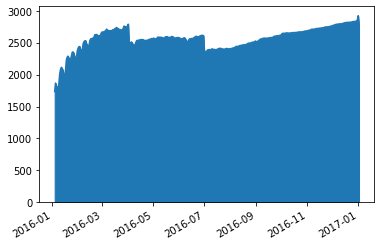

In [235]:
series.plot(kind='area')

(array([16801., 16861., 16922., 16983., 17045., 17106., 17167.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

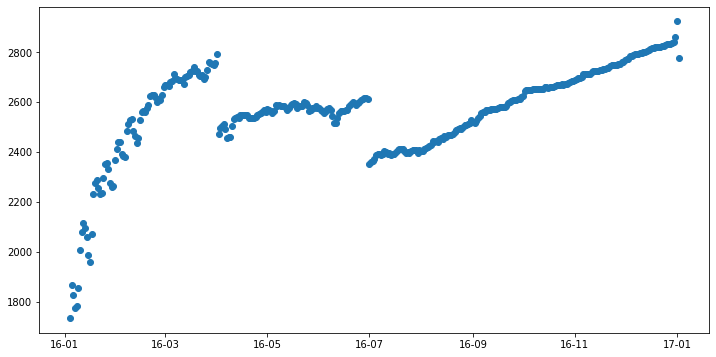

In [236]:
plt.figure(figsize=(12,6))
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%y-%m') # here you can format your datetick labels as desired
plt.plot_date(series.index,series.values)
plt.gca().xaxis.set_major_formatter(myFmt)
plt.xticks()

In [237]:
calender['year'] = calender['date'].apply(lambda x: x.year)
calender['month'] = calender['date'].apply(lambda x: x.month)
calender['day'] = calender['date'].apply(lambda x: x.day)

In [238]:
calender

,listing_id,date,available,price,year,month,day
0,241032,2016-01-04,t,85.0,2016,1,4
1,241032,2016-01-05,t,85.0,2016,1,5
2,241032,2016-01-06,f,NaN,2016,1,6
3,241032,2016-01-07,f,NaN,2016,1,7
4,241032,2016-01-08,f,NaN,2016,1,8
...,...,...,...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN,2016,12,29
1393566,10208623,2016-12-30,f,NaN,2016,12,30
1393567,10208623,2016-12-31,f,NaN,2016,12,31
1393568,10208623,2017-01-01,f,NaN,2017,1,1


([<matplotlib.axis.XTick at 0x219aa0fb888>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

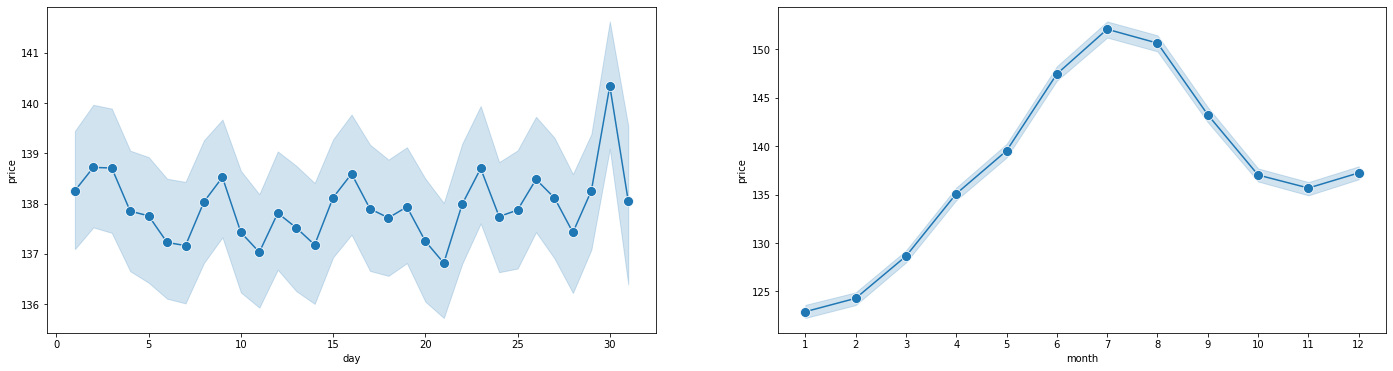

In [239]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(24,6))
sns.lineplot(x='day',y='price',data=calender[calender['available'] == 't'],marker='o',markersize=10,ax=ax[0])
sns.lineplot(x='month',y='price',data=calender[calender['available'] == 't'],marker='o',markersize=10,ax=ax[1])
plt.xticks(np.arange(1,13,1))

<AxesSubplot:xlabel='month', ylabel='count'>

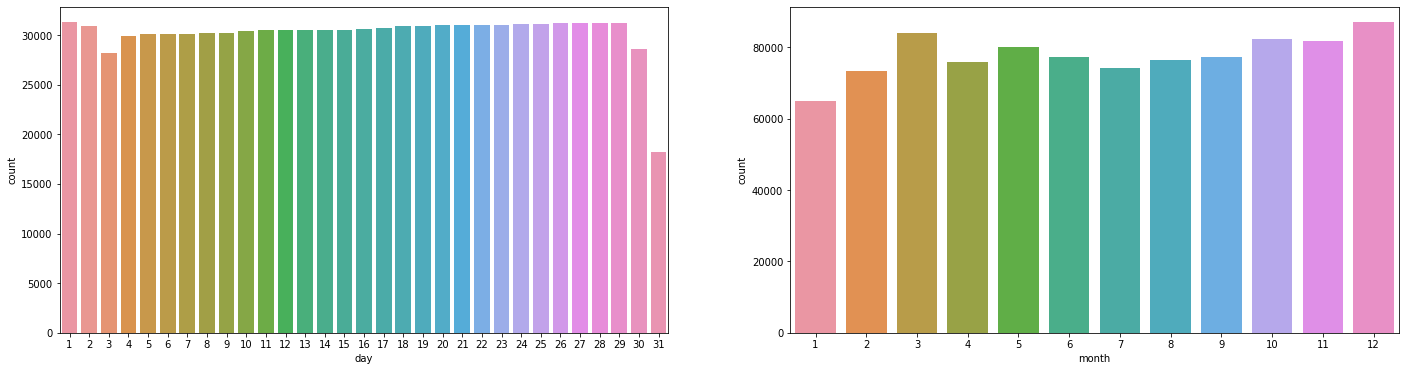

In [240]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(24,6))
sns.countplot(x='day',data=calender[calender['available'] == 't'],ax=ax[0])
sns.countplot(x='month',data=calender[calender['available'] == 't'],ax=ax[1])

Listings Data

In [241]:
listings

,listing_id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,thumbnail_url,...,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,id,date,reviewer_id,reviewer_name,comments,estimated_revenue
0,241032,https://www.airbnb.com/rooms/241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,NaN,...,f,f,2,4.07,682061,2011-11-01,479824,Bro,Excellent all the way around. \r\n\r\nMaija wa...,85.0
1,241032,https://www.airbnb.com/rooms/241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,NaN,...,f,f,2,4.07,691712,2011-11-04,357699,Megan,Maija's apartment was a wonderful place to sta...,85.0
2,241032,https://www.airbnb.com/rooms/241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,NaN,...,f,f,2,4.07,702999,2011-11-08,1285567,Marylee,one of the most pleasant stays i've had in my ...,85.0
3,241032,https://www.airbnb.com/rooms/241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,NaN,...,f,f,2,4.07,717262,2011-11-14,647857,Graham,"Maija's suite is beautiful, cozy and convenien...",85.0
4,241032,https://www.airbnb.com/rooms/241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,NaN,...,f,f,2,4.07,730226,2011-11-19,1389821,Franka,Our stay was short and pleasant. With its own ...,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84844,3383329,https://www.airbnb.com/rooms/3383329,OF THE TREE & CLOUDS. KID FRIENDLY!,"Of the Tree & Clouds' ""Roots"" apartment is 8 b...","The 1-bedroom, ground-floor Roots apartment is...","Of the Tree & Clouds' ""Roots"" apartment is 8 b...",It's taken me a while to figure out why Fremon...,There is NO television. We do have good WI-FI....,The apartment is easily accessed from I-5 Nort...,https://a0.muscache.com/ac/pictures/108686685/...,...,t,t,3,4.01,55357027,2015-12-01,19459912,David,Had a great stay at Jacqueline's place! Plenty...,285.0
84845,3383329,https://www.airbnb.com/rooms/3383329,OF THE TREE & CLOUDS. KID FRIENDLY!,"Of the Tree & Clouds' ""Roots"" apartment is 8 b...","The 1-bedroom, ground-floor Roots apartment is...","Of the Tree & Clouds' ""Roots"" apartment is 8 b...",It's taken me a while to figure out why Fremon...,There is NO television. We do have good WI-FI....,The apartment is easily accessed from I-5 Nort...,https://a0.muscache.com/ac/pictures/108686685/...,...,t,t,3,4.01,57757540,2015-12-29,645719,Betsi,Jacqueline was a fantastic host. She was alwa...,285.0
84846,8101950,https://www.airbnb.com/rooms/8101950,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,We're located near lots of family fun. Woodlan...,NaN,NaN,https://a2.muscache.com/ac/pictures/103217071/...,...,f,f,8,0.30,48634004,2015-09-27,43900518,Jonathan,There was a bottle of wine and some chocolate ...,1077.0
84847,8902327,https://www.airbnb.com/rooms/8902327,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,The neighborhood is a quiet oasis that is clos...,This is a basement apartment in a newer reside...,Uber and Car2go are good options in Seattle. T...,https://a2.muscache.com/ac/pictures/626d4b1f-6...,...,f,f,1,2.00,56818248,2015-12-18,1495780,James,We had a great experience in a fantastic space...,158.0


In [242]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84849 entries, 0 to 84848
Data columns (total 85 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   listing_id                        84849 non-null  int64         
 1   listing_url                       84849 non-null  object        
 2   name                              84849 non-null  object        
 3   summary                           75850 non-null  object        
 4   space                             81901 non-null  object        
 5   description                       84849 non-null  object        
 6   neighborhood_overview             66434 non-null  object        
 7   notes                             56690 non-null  object        
 8   transit                           70120 non-null  object        
 9   thumbnail_url                     79801 non-null  object        
 10  medium_url                        79801 non-nu

In [243]:
listings[['price','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
          'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]

,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,85.0,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,85.0,95.0,10.0,10.0,10.0,10.0,9.0,10.0
2,85.0,95.0,10.0,10.0,10.0,10.0,9.0,10.0
3,85.0,95.0,10.0,10.0,10.0,10.0,9.0,10.0
4,85.0,95.0,10.0,10.0,10.0,10.0,9.0,10.0
...,...,...,...,...,...,...,...,...
84844,95.0,96.0,10.0,10.0,10.0,10.0,9.0,10.0
84845,95.0,96.0,10.0,10.0,10.0,10.0,9.0,10.0
84846,359.0,80.0,8.0,10.0,4.0,8.0,10.0,8.0
84847,79.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0


In [244]:
listings['host_location'].value_counts()

Seattle, Washington, United States       78199
US                                        1681
Kent, Washington, United States            509
Seattle                                    503
Spokane, Washington, United States         412
                                         ...  
Ault, Colorado, United States                1
Quilcene, Washington, United States          1
Massachusetts, United States                 1
Burien, Washington, United States            1
Gig Harbor, Washington, United States        1
Name: host_location, Length: 101, dtype: int64

In [245]:
len(listings['beds'].value_counts())

11

In [246]:
len(listings['amenities'].value_counts())

2750

In [247]:
for col in listings.columns:
    if len(listings[col].value_counts()) < 20:
        print(col)

host_response_time
host_acceptance_rate
host_is_superhost
host_has_profile_pic
host_identity_verified
neighbourhood_group_cleansed
city
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
guests_included
minimum_nights
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
instant_bookable
cancellation_policy
require_guest_profile_picture
require_guest_phone_verification
calculated_host_listings_count


In [248]:
listings['guests_included'].value_counts()

1     40284
2     32967
4      4722
0      2379
3      2162
6       969
8       584
7       391
5       311
10       41
13       21
9        14
12        4
Name: guests_included, dtype: int64

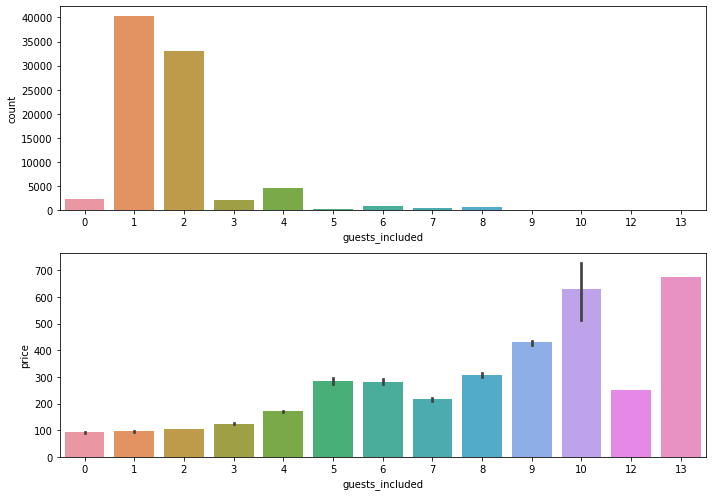

In [249]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,7))
sns.countplot(x='guests_included',data=listings,ax=ax[0])
sns.barplot(x='guests_included',y='price',data=listings,ax=ax[1])
plt.tight_layout()

<AxesSubplot:xlabel='guests_included', ylabel='estimated_revenue'>

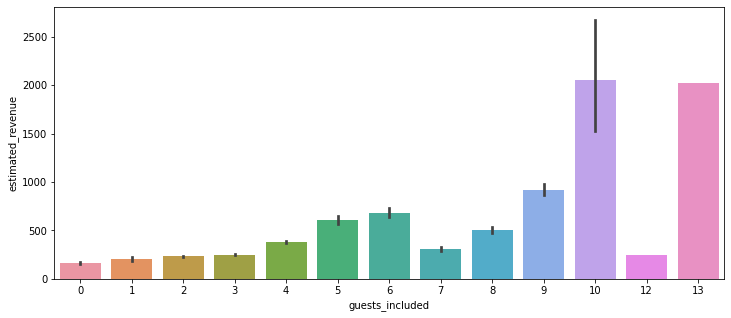

In [250]:
plt.figure(figsize=(12,5))
sns.barplot(x='guests_included',y='estimated_revenue',data=listings)

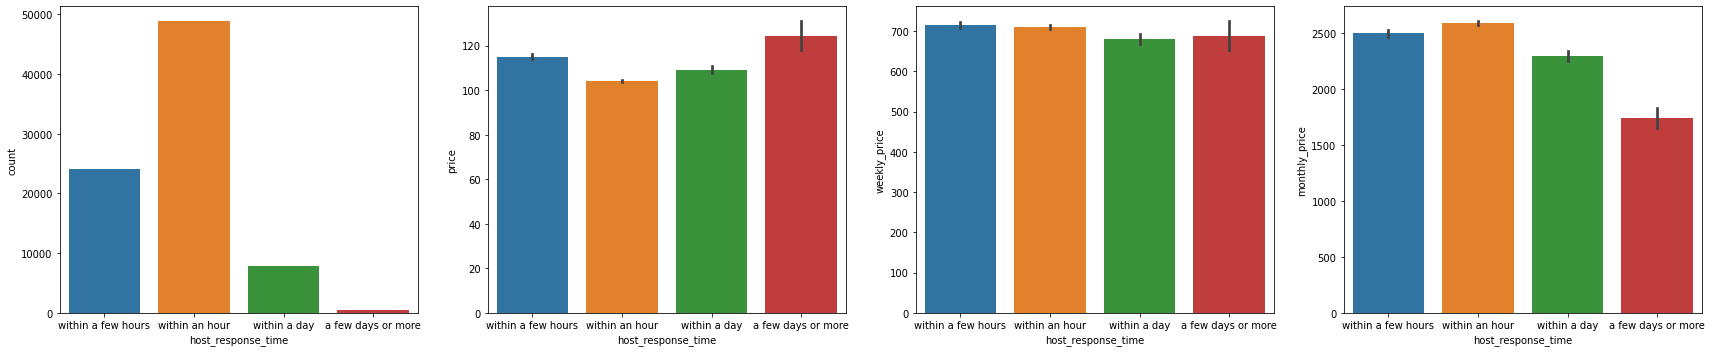

In [251]:
fig,ax = plt.subplots(nrows=1,ncols=4,figsize=(24,5))

sns.countplot(x='host_response_time',data=listings,ax=ax[0])
sns.barplot(x='host_response_time',y='price',data=listings,ax=ax[1])
sns.barplot(x='host_response_time',y='weekly_price',data=listings,ax=ax[2])
sns.barplot(x='host_response_time',y='monthly_price',data=listings,ax=ax[3])
plt.tight_layout()

<AxesSubplot:xlabel='host_response_time', ylabel='estimated_revenue'>

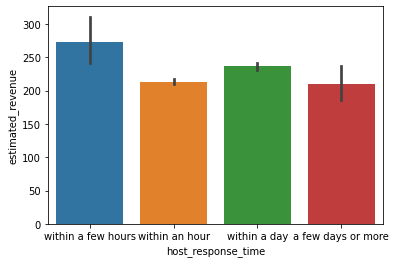

In [252]:
sns.barplot(x='host_response_time',y='estimated_revenue',data=listings)

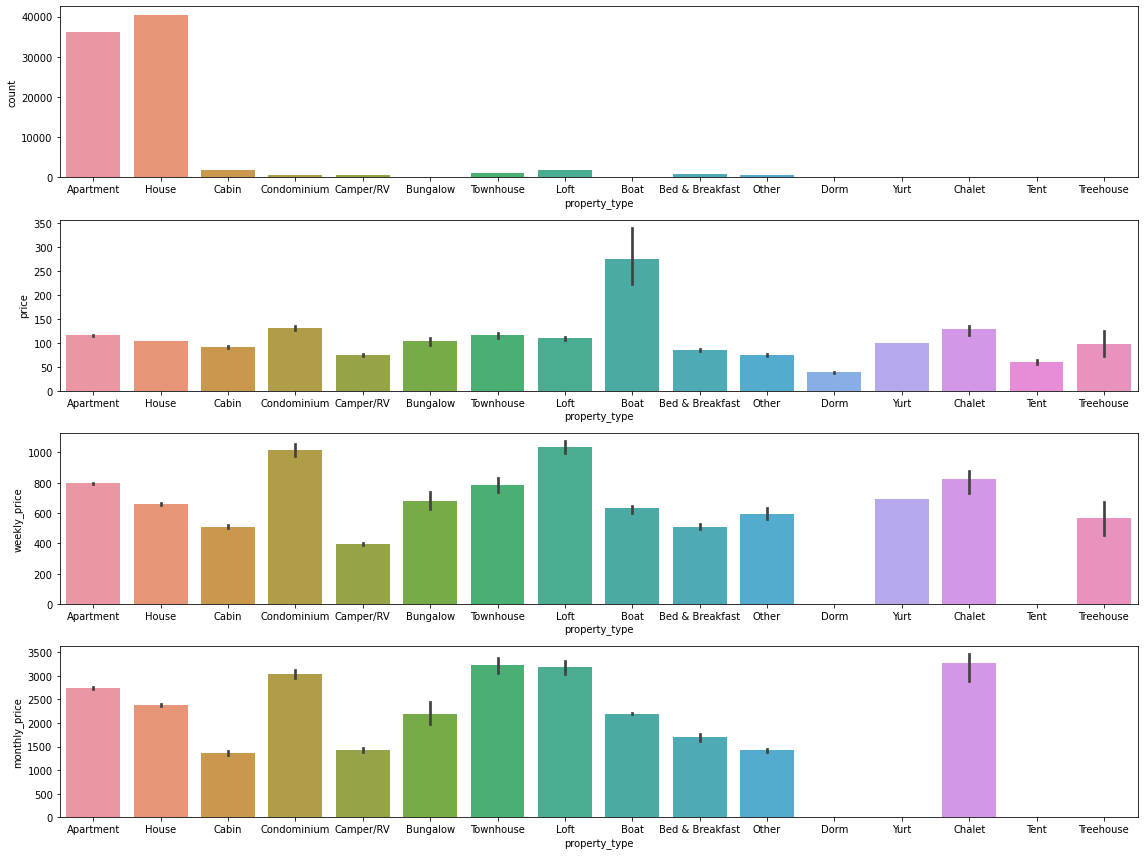

In [253]:
plt.figure(figsize=(16,12))
plt.subplot(411)
sns.countplot(x='property_type',data=listings)
plt.subplot(412)
sns.barplot(x='property_type',y='price',data=listings)
plt.subplot(413)
sns.barplot(x='property_type',y='weekly_price',data=listings)
plt.subplot(414)
sns.barplot(x='property_type',y='monthly_price',data=listings)

plt.tight_layout()

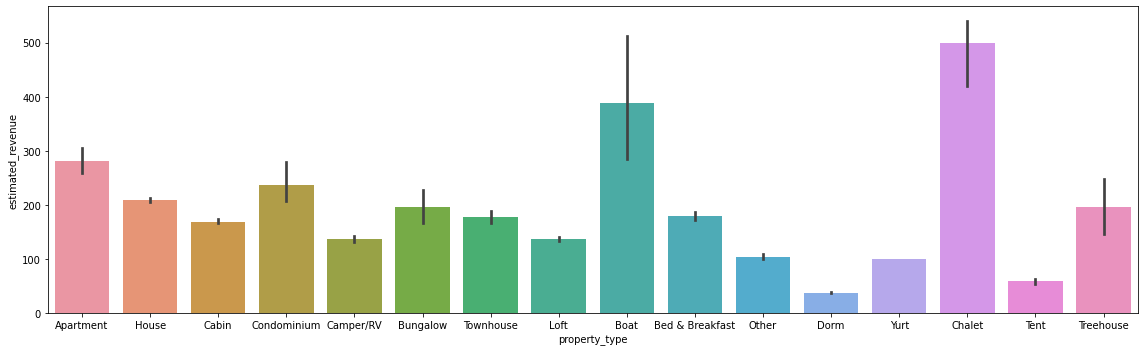

In [254]:
plt.figure(figsize=(16,5))
sns.barplot(x='property_type',y='estimated_revenue',data=listings)
plt.tight_layout()

C:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


<AxesSubplot:xlabel='review_scores_cleanliness', ylabel='cleaning_fee'>

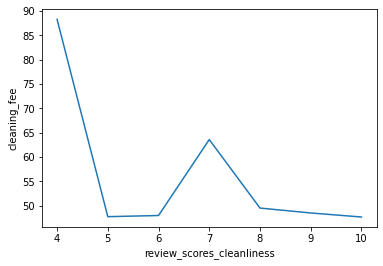

In [255]:
sns.lineplot(x='review_scores_cleanliness',y='cleaning_fee',data=listings)

In [256]:
listings['review_scores_cleanliness'].value_counts()

10.0    57983
9.0     22520
8.0      3648
7.0       524
6.0       111
5.0        25
4.0         9
3.0         2
Name: review_scores_cleanliness, dtype: int64

<AxesSubplot:xlabel='host_identity_verified', ylabel='estimated_revenue'>

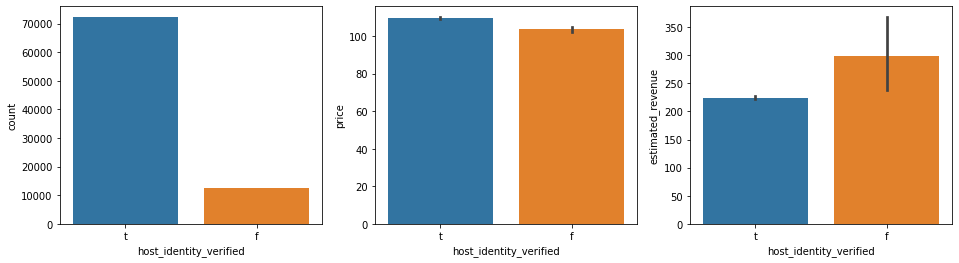

In [257]:
fig, ax =plt.subplots(1,3,figsize=(16,4))

sns.countplot(x='host_identity_verified',data=listings,ax=ax[0])
sns.barplot(x='host_identity_verified',y='price',data=listings,ax=ax[1])
sns.barplot(x='host_identity_verified',y='estimated_revenue',data=listings,ax=ax[2])

<AxesSubplot:xlabel='property_type', ylabel='monthly_price'>

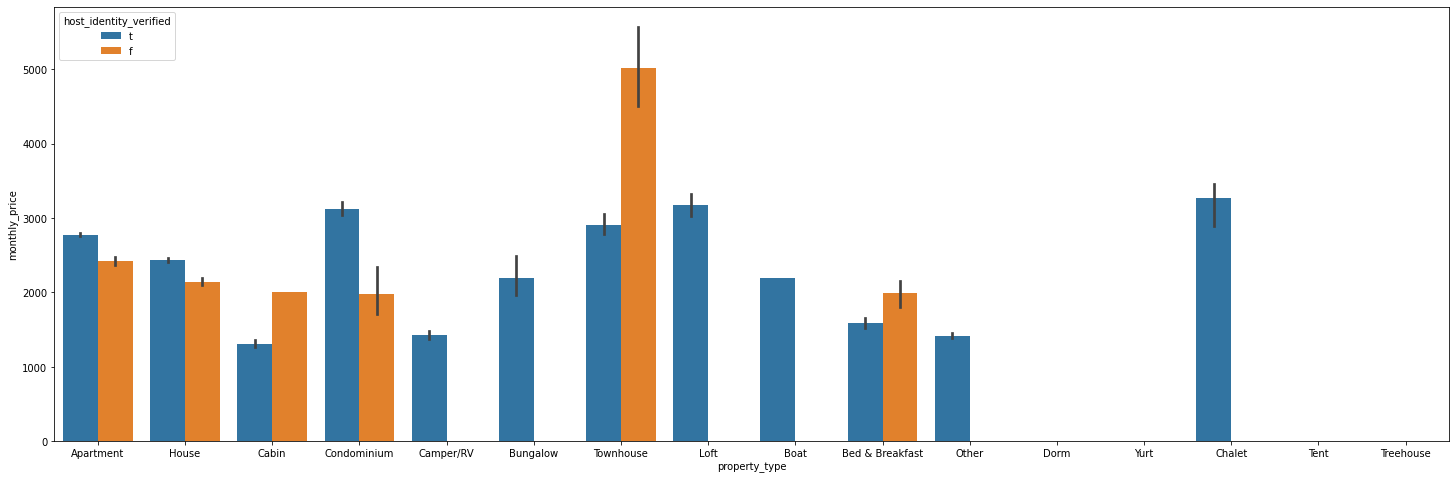

In [258]:
plt.figure(figsize=(25,8))

sns.barplot(x='property_type',y='monthly_price',data=listings,hue='host_identity_verified')

<AxesSubplot:xlabel='property_type', ylabel='monthly_price'>

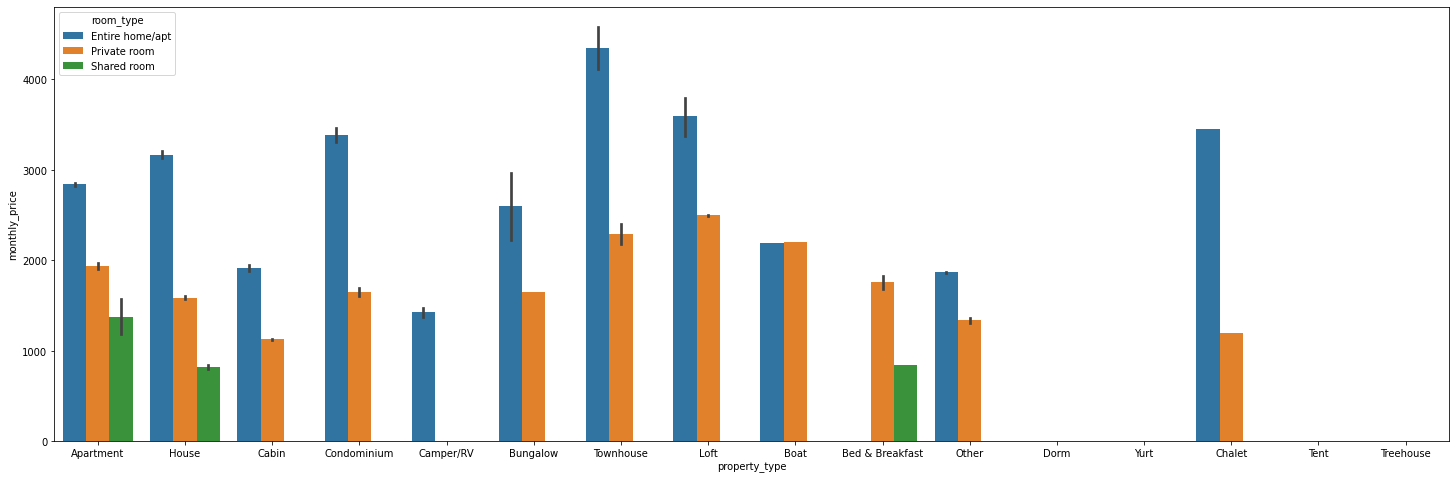

In [259]:
plt.figure(figsize=(25,8))

sns.barplot(x='property_type',y='monthly_price',data=listings,hue='room_type')

<AxesSubplot:xlabel='room_type', ylabel='estimated_revenue'>

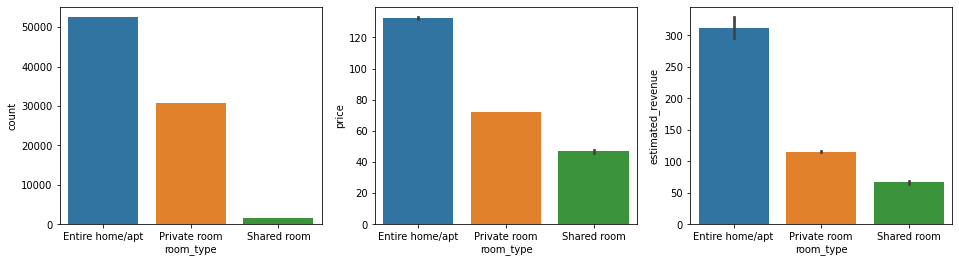

In [260]:
fig, ax =plt.subplots(1,3,figsize=(16,4))
sns.countplot(x='room_type',data=listings,ax=ax[0])
sns.barplot(x='room_type',y='price',data=listings,ax=ax[1])
sns.barplot(x='room_type',y='estimated_revenue',data=listings,ax=ax[2])

<AxesSubplot:xlabel='accommodates', ylabel='estimated_revenue'>

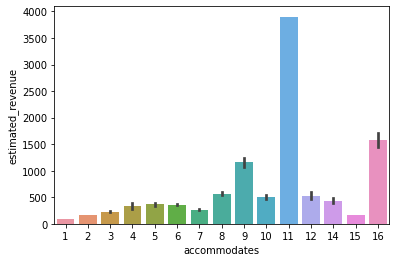

In [261]:
sns.barplot(x='accommodates',y='estimated_revenue',data=listings)

<AxesSubplot:xlabel='bed_type', ylabel='estimated_revenue'>

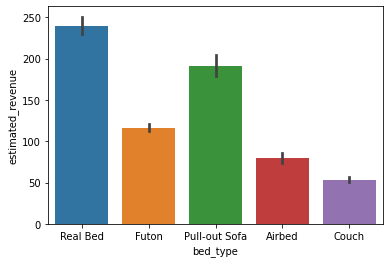

In [262]:
sns.barplot(x='bed_type',y='estimated_revenue',data=listings)

<AxesSubplot:xlabel='beds', ylabel='estimated_revenue'>

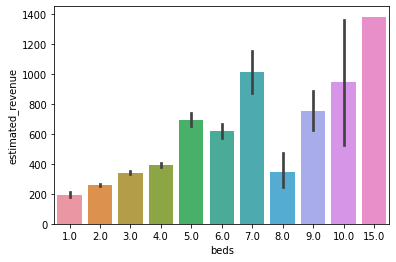

In [263]:
sns.barplot(x='beds',y='estimated_revenue',data=listings)

<AxesSubplot:xlabel='bedrooms', ylabel='estimated_revenue'>

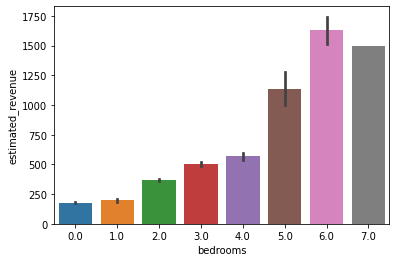

In [264]:
sns.barplot(x='bedrooms',y='estimated_revenue',data=listings)

<AxesSubplot:xlabel='bathrooms', ylabel='estimated_revenue'>

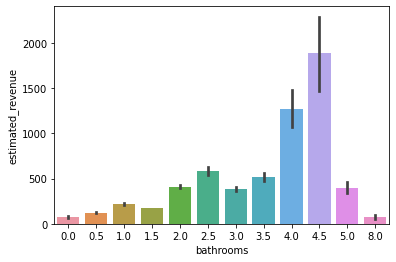

In [265]:
sns.barplot(x='bathrooms',y='estimated_revenue',data=listings)

In [266]:
listings['room_type'].value_counts()

Entire home/apt    52465
Private room       30870
Shared room         1514
Name: room_type, dtype: int64

In [267]:
listings['accommodates'].value_counts()

2     42821
4     16041
3     10170
6      5580
1      3542
5      3221
8      1501
7       956
10      520
12      229
9        98
14       83
16       48
11       20
15       19
Name: accommodates, dtype: int64

In [268]:
listings['bed_type'].value_counts()

Real Bed         81625
Futon             1714
Pull-out Sofa     1064
Airbed             383
Couch               63
Name: bed_type, dtype: int64

In [269]:
listings['beds'].value_counts()

1.0     54886
2.0     18522
3.0      7785
4.0      2421
5.0       576
6.0       264
7.0       209
9.0       103
8.0        56
15.0       18
10.0        9
Name: beds, dtype: int64

In [270]:
listings['bedrooms'].value_counts()

1.0    61399
2.0    10593
0.0     8113
3.0     3593
4.0      569
5.0      205
6.0       82
7.0        5
Name: bedrooms, dtype: int64

In [271]:
listings['bathrooms'].value_counts()

1.0    69850
1.5     5678
2.0     4905
2.5     1497
3.0     1179
3.5      570
0.5      366
4.5       58
4.0       56
0.0       46
5.0       27
8.0        8
Name: bathrooms, dtype: int64

In [272]:
listings['host_has_profile_pic'].value_counts()

t    84813
f       36
Name: host_has_profile_pic, dtype: int64

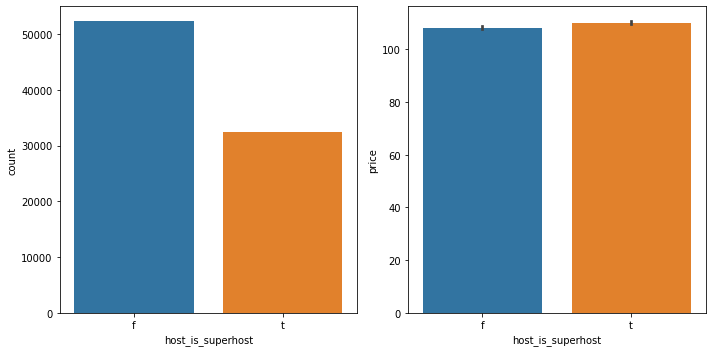

In [273]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(x='host_is_superhost',data=listings,ax=ax[0])
sns.barplot(x='host_is_superhost',y='price',data=listings,ax=ax[1])
plt.tight_layout()

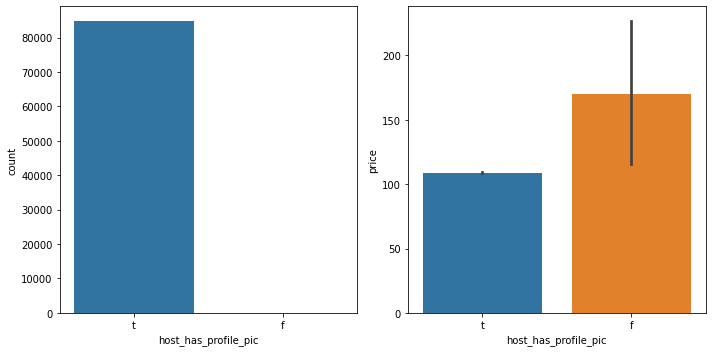

In [274]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(x='host_has_profile_pic',data=listings,ax=ax[0])
sns.barplot(x='host_has_profile_pic',y='price',data=listings,ax=ax[1])
plt.tight_layout()

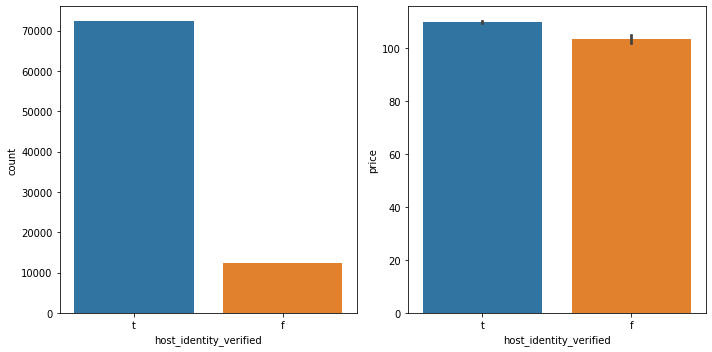

In [275]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(x='host_identity_verified',data=listings,ax=ax[0])
sns.barplot(x='host_identity_verified',y='price',data=listings,ax=ax[1])
plt.tight_layout()

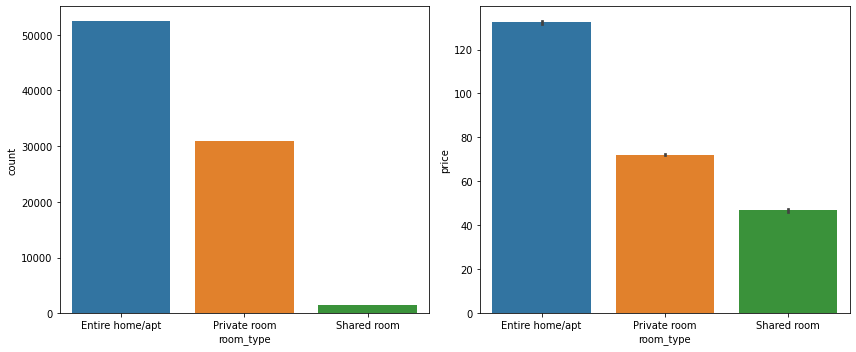

In [276]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(x='room_type',data=listings,ax=ax[0])
sns.barplot(x='room_type',y='price',data=listings,ax=ax[1])
plt.tight_layout()

In [277]:
listings['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    17210
Downtown               12606
Capitol Hill           12412
Central Area            8442
Ballard                 7118
Queen Anne              6613
Rainier Valley          4085
West Seattle            3407
Beacon Hill             3355
Delridge                2197
Cascade                 1420
Northgate               1389
University District     1316
Seward Park             1195
Lake City               1028
Magnolia                 933
Interbay                 123
Name: neighbourhood_group_cleansed, dtype: int64

In [278]:
listings['minimum_nights'].value_counts()

2       37212
1       35197
3        9917
4        1054
5         428
14        283
7         240
20        162
6         156
31        100
30         45
10         35
1000        8
29          4
13          3
12          3
21          1
26          1
Name: minimum_nights, dtype: int64

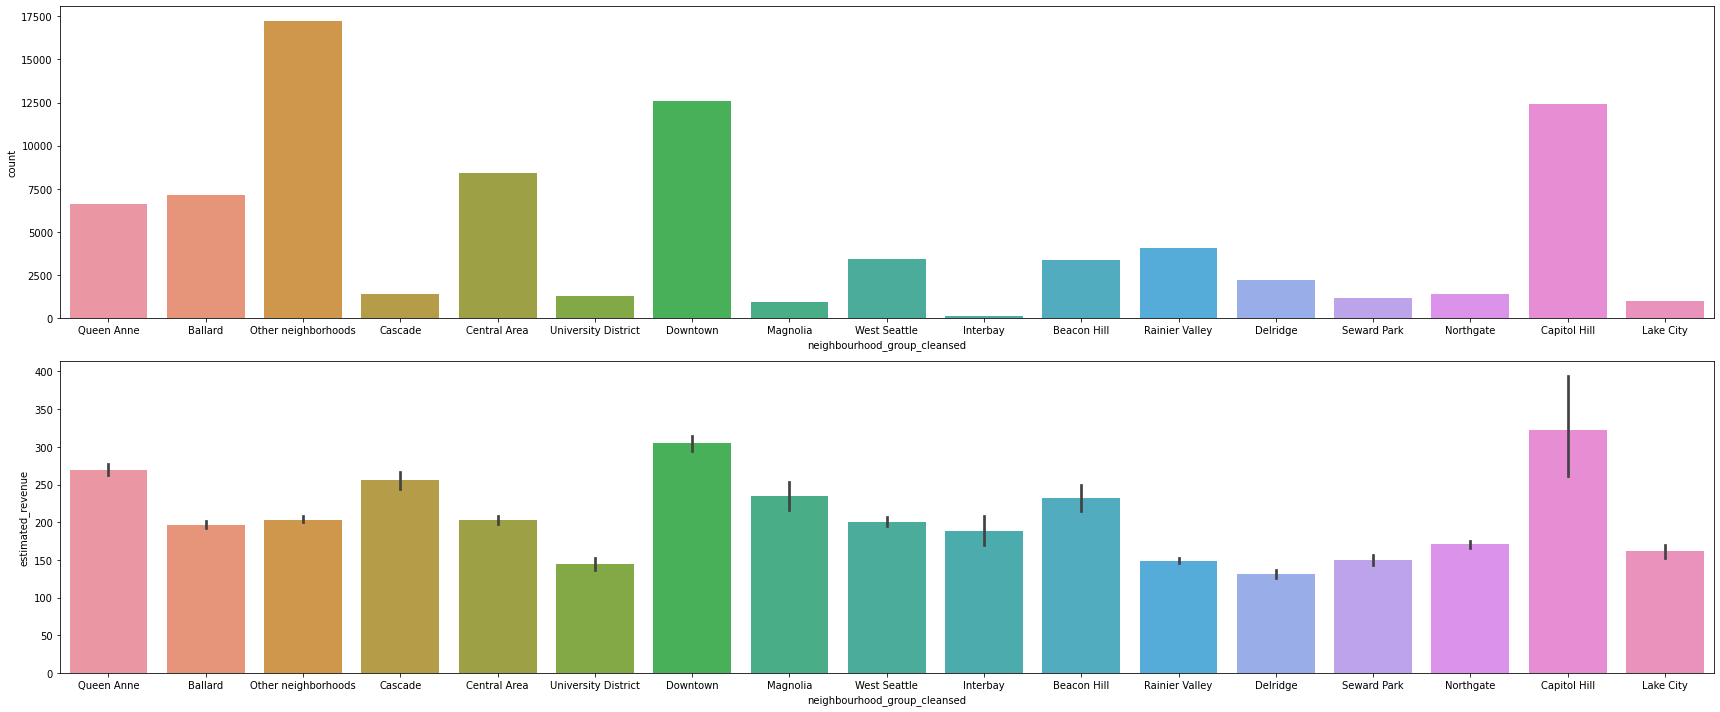

In [279]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(24,10))
sns.countplot(x='neighbourhood_group_cleansed',data=listings,ax=ax[0])
sns.barplot(x='neighbourhood_group_cleansed',y='estimated_revenue',data=listings,ax=ax[1])
plt.tight_layout()

In [280]:
listings['estimated_revenue']

0          85.0
1          85.0
2          85.0
3          85.0
4          85.0
          ...  
84844     285.0
84845     285.0
84846    1077.0
84847     158.0
84848     158.0
Name: estimated_revenue, Length: 84849, dtype: float64

<AxesSubplot:xlabel='date', ylabel='estimated_revenue'>

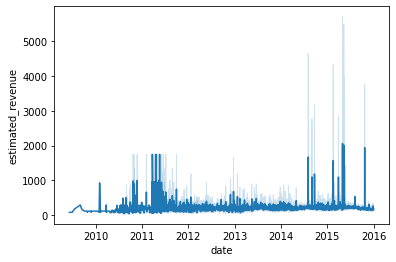

In [281]:
sns.lineplot(x='date',y='estimated_revenue',data=listings)

In [282]:
listings['year'] = listings['date'].apply(lambda x: x.year)
listings['month'] = listings['date'].apply(lambda x: x.month)
listings['day'] = listings['date'].apply(lambda x: x.day)

In [283]:
listings['host_since_year'] = listings['host_since'].apply(lambda x: x.year)
listings['host_since_month'] = listings['host_since'].apply(lambda x: x.month)
listings['host_since_day'] = listings['host_since'].apply(lambda x: x.day)

In [284]:
listings['first_review_year'] = listings['first_review'].apply(lambda x: x.year)
listings['first_review_month'] = listings['first_review'].apply(lambda x: x.month)
listings['first_review_day'] = listings['first_review'].apply(lambda x: x.day)

In [285]:
listings['last_review_year'] = listings['last_review'].apply(lambda x: x.year)
listings['last_review_month'] = listings['last_review'].apply(lambda x: x.month)
listings['last_review_day'] = listings['last_review'].apply(lambda x: x.day)

In [286]:
listings['month']

0        11
1        11
2        11
3        11
4        11
         ..
84844    12
84845    12
84846     9
84847    12
84848    12
Name: month, Length: 84849, dtype: int64

([<matplotlib.axis.XTick at 0x2198e79ca08>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

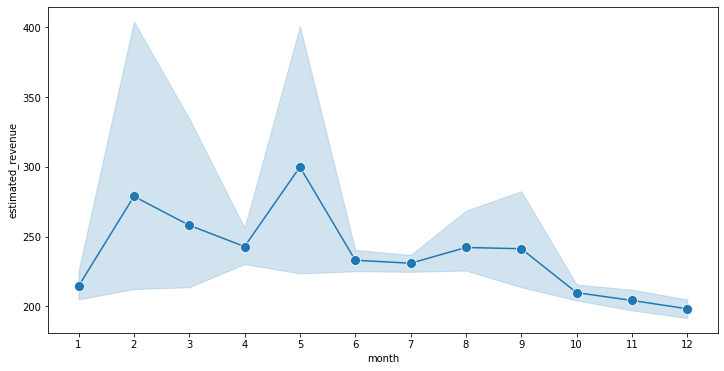

In [287]:
plt.figure(figsize=(12,6))
sns.lineplot(x='month',y='estimated_revenue',data=listings,marker='o',markersize=10)
plt.xticks(np.arange(1,13,1))

<AxesSubplot:xlabel='year', ylabel='estimated_revenue'>

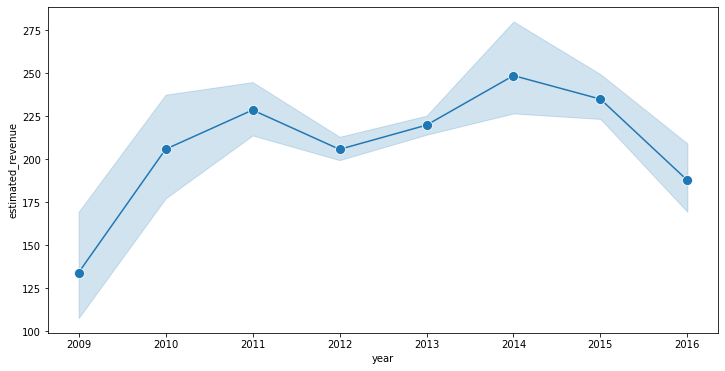

In [288]:
plt.figure(figsize=(12,6))

sns.lineplot(x='year',y='estimated_revenue',data=listings,marker='o',markersize=10)

([<matplotlib.axis.XTick at 0x2198d849988>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

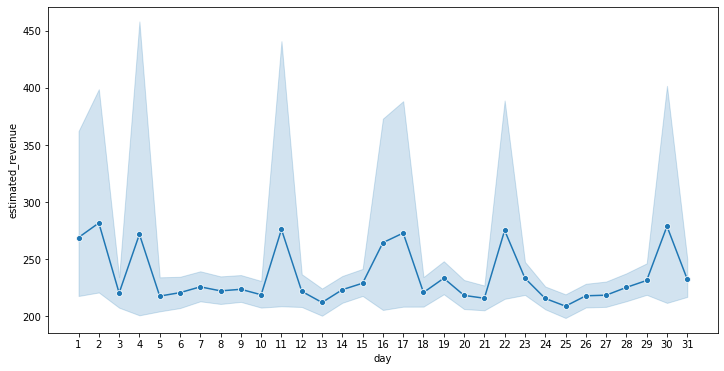

In [289]:
plt.figure(figsize=(12,6))

sns.lineplot(x='day',y='estimated_revenue',data=listings,marker='o',markersize=6)
plt.xticks(np.arange(1,32,1))

In [290]:
#host_response_time
#host_acceptance_rate
#host_is_superhost
#host_has_profile_pic
#host_identity_verified
#neighbourhood_group_cleansed
#city
#state
#smart_location
#is_location_exact
#property_type
#room_type
#accommodates
#bathrooms
#bedrooms
#beds
#bed_type
#guests_included
#minimum_nights
#review_scores_accuracy
#review_scores_cleanliness
#review_scores_checkin
#review_scores_communication
#review_scores_location
#review_scores_value
#instant_bookable
#cancellation_policy
#require_guest_profile_picture
#require_guest_phone_verification
#calculated_host_listings_count

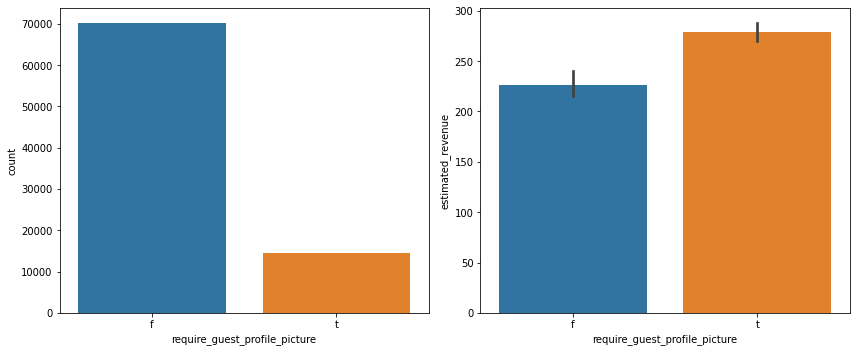

In [291]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(x='require_guest_profile_picture',data=listings,ax=ax[0])
sns.barplot(x='require_guest_profile_picture',y='estimated_revenue',data=listings,ax=ax[1])
plt.tight_layout()

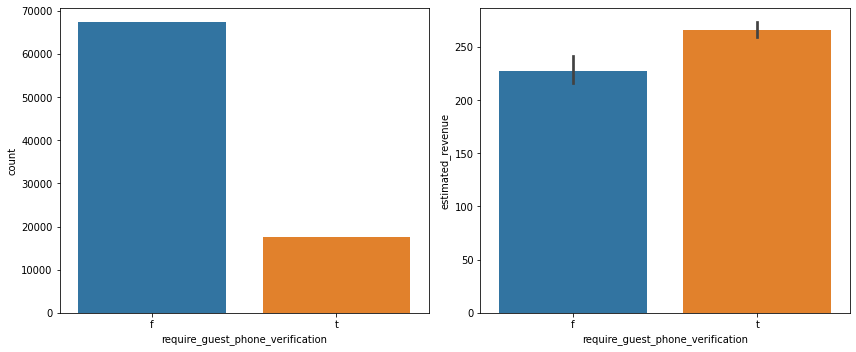

In [292]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(x='require_guest_phone_verification',data=listings,ax=ax[0])
sns.barplot(x='require_guest_phone_verification',y='estimated_revenue',data=listings,ax=ax[1])
plt.tight_layout()

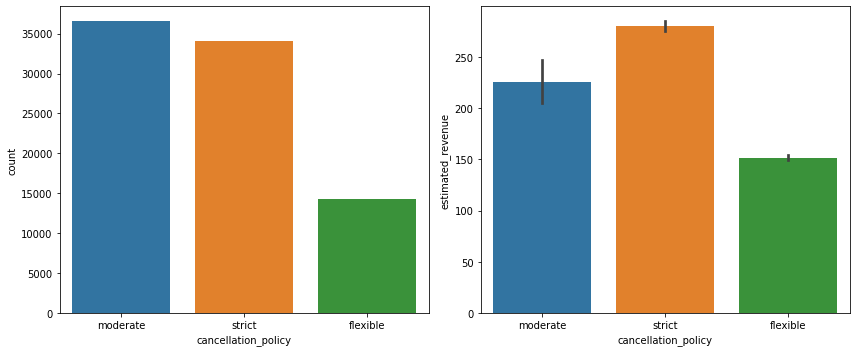

In [293]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(x='cancellation_policy',data=listings,ax=ax[0])
sns.barplot(x='cancellation_policy',y='estimated_revenue',data=listings,ax=ax[1])
plt.tight_layout()

C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35199 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38597 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 35199 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 38597 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0, flags=flags)


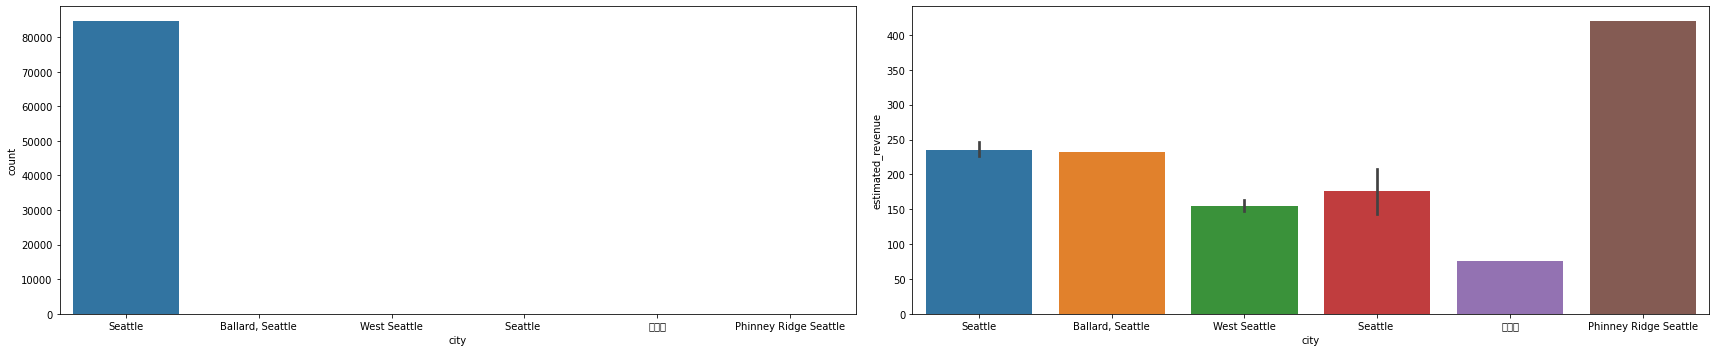

In [294]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(24,5))
sns.countplot(x='city',data=listings,ax=ax[0])
sns.barplot(x='city',y='estimated_revenue',data=listings,ax=ax[1])
plt.tight_layout()

In [295]:
listings['city'].value_counts()

Seattle                  84667
Ballard, Seattle            74
West Seattle                40
Seattle                     30
西雅图                         27
Phinney Ridge Seattle       11
Name: city, dtype: int64

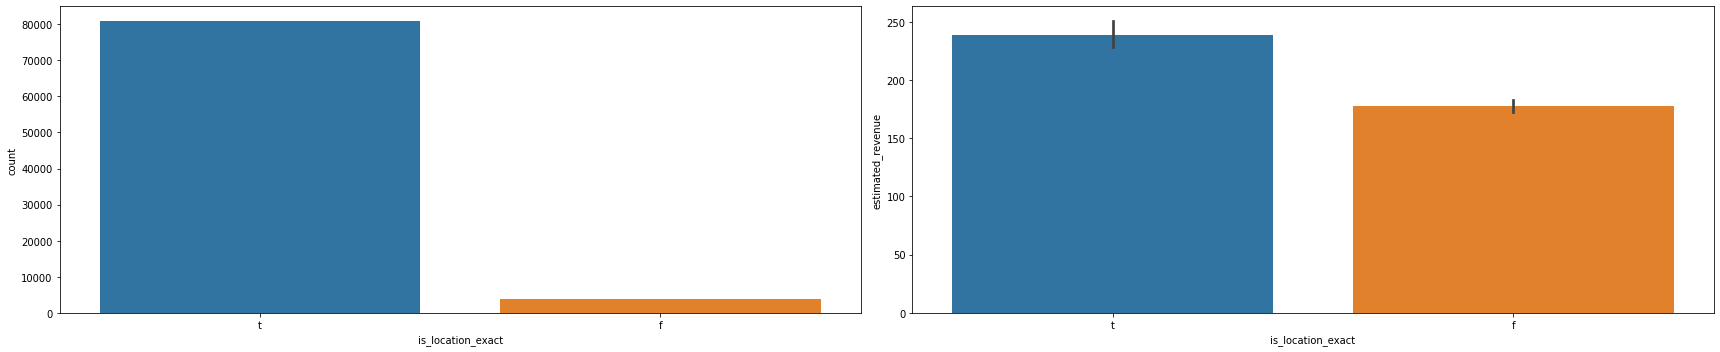

In [296]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(24,5))
sns.countplot(x='is_location_exact',data=listings,ax=ax[0])
sns.barplot(x='is_location_exact',y='estimated_revenue',data=listings,ax=ax[1])
plt.tight_layout()

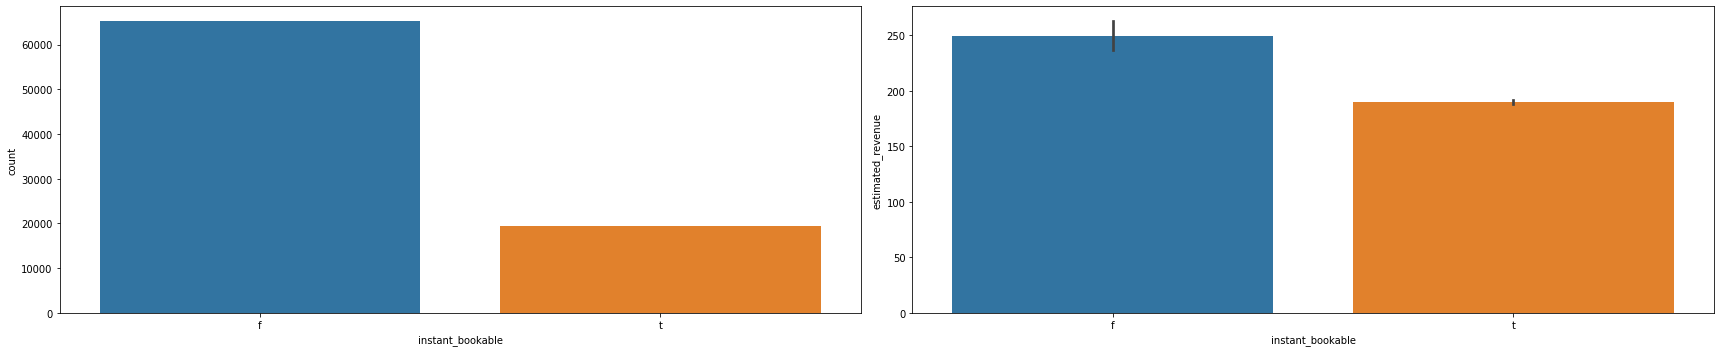

In [297]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(24,5))
sns.countplot(x='instant_bookable',data=listings,ax=ax[0])
sns.barplot(x='instant_bookable',y='estimated_revenue',data=listings,ax=ax[1])
plt.tight_layout()

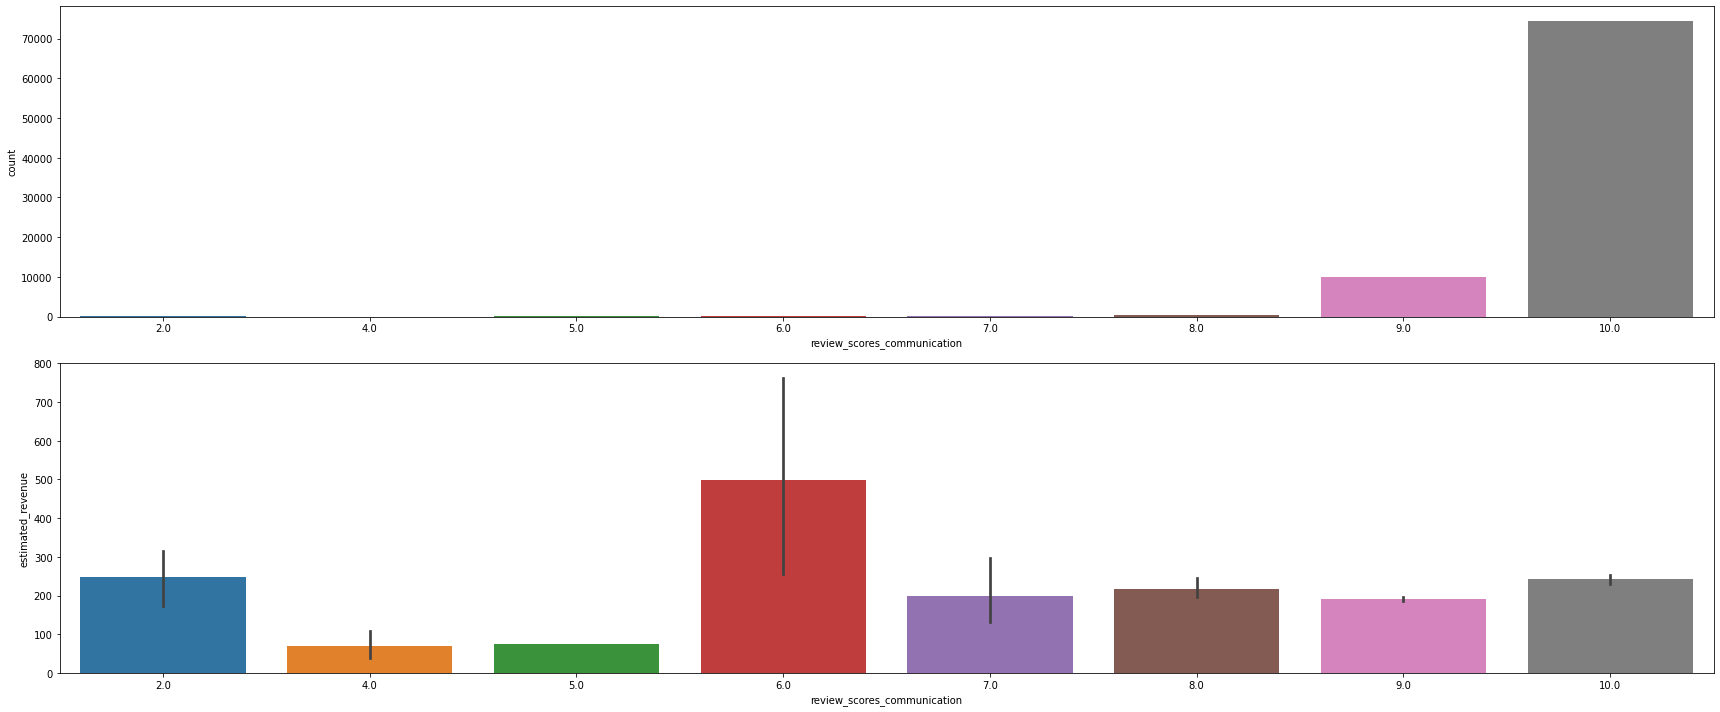

In [298]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(24,10))
sns.countplot(x='review_scores_communication',data=listings,ax=ax[0])
sns.barplot(x='review_scores_communication',y='estimated_revenue',data=listings,ax=ax[1])
plt.tight_layout()

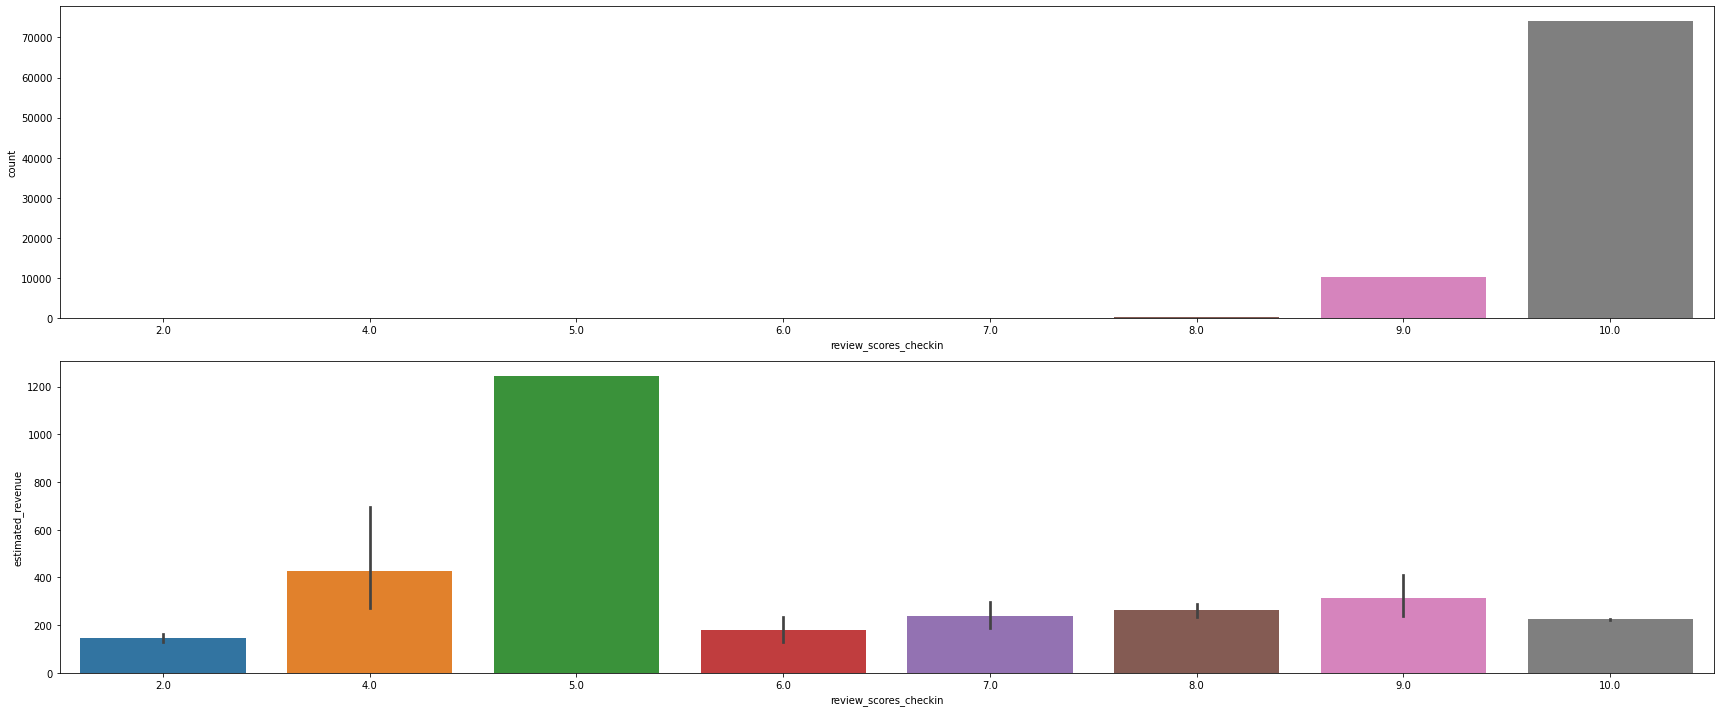

In [299]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(24,10))
sns.countplot(x='review_scores_checkin',data=listings,ax=ax[0])
sns.barplot(x='review_scores_checkin',y='estimated_revenue',data=listings,ax=ax[1])
plt.tight_layout()

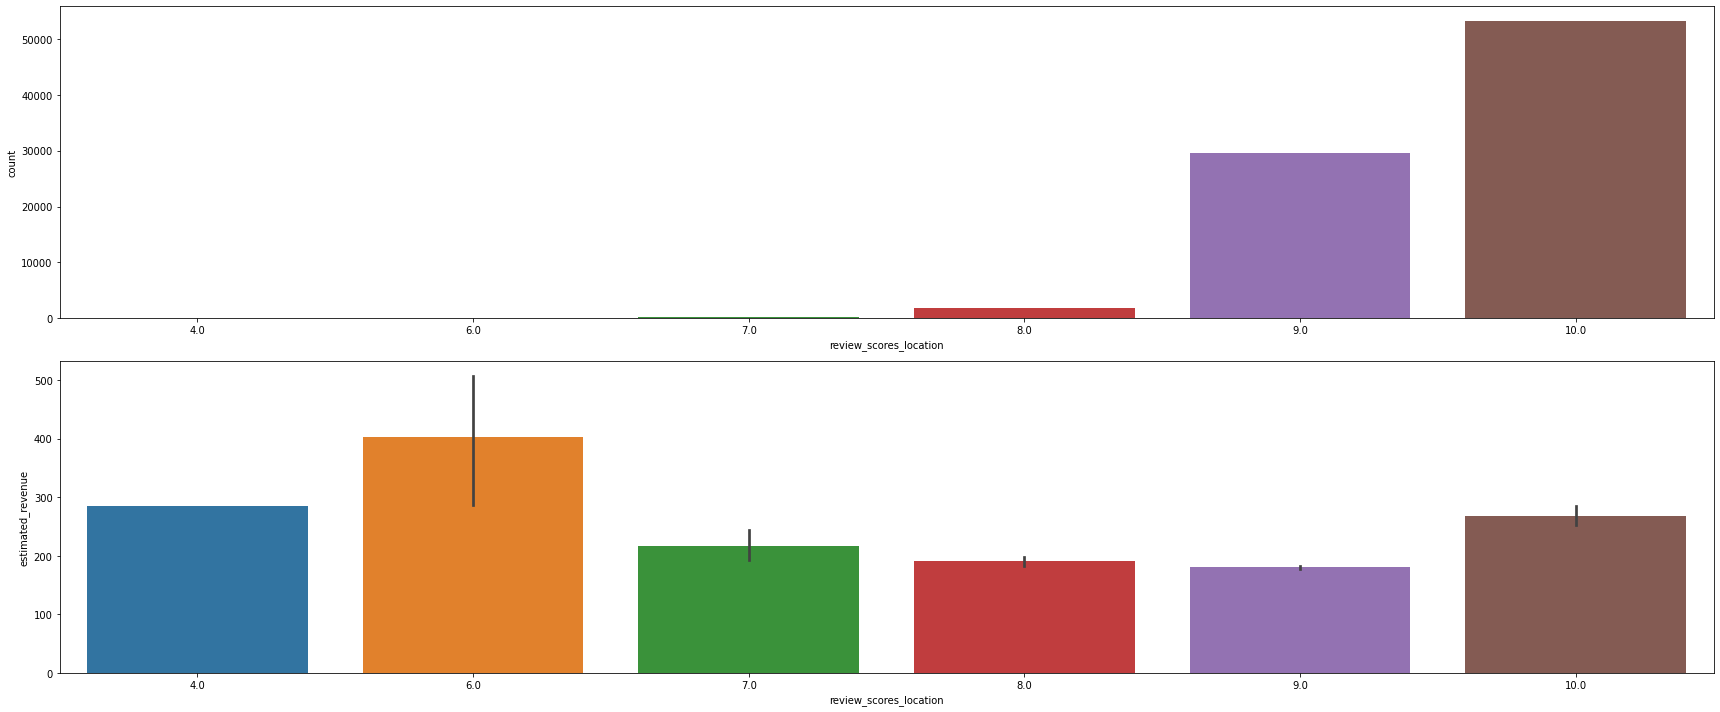

In [300]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(24,10))
sns.countplot(x='review_scores_location',data=listings,ax=ax[0])
sns.barplot(x='review_scores_location',y='estimated_revenue',data=listings,ax=ax[1])
plt.tight_layout()

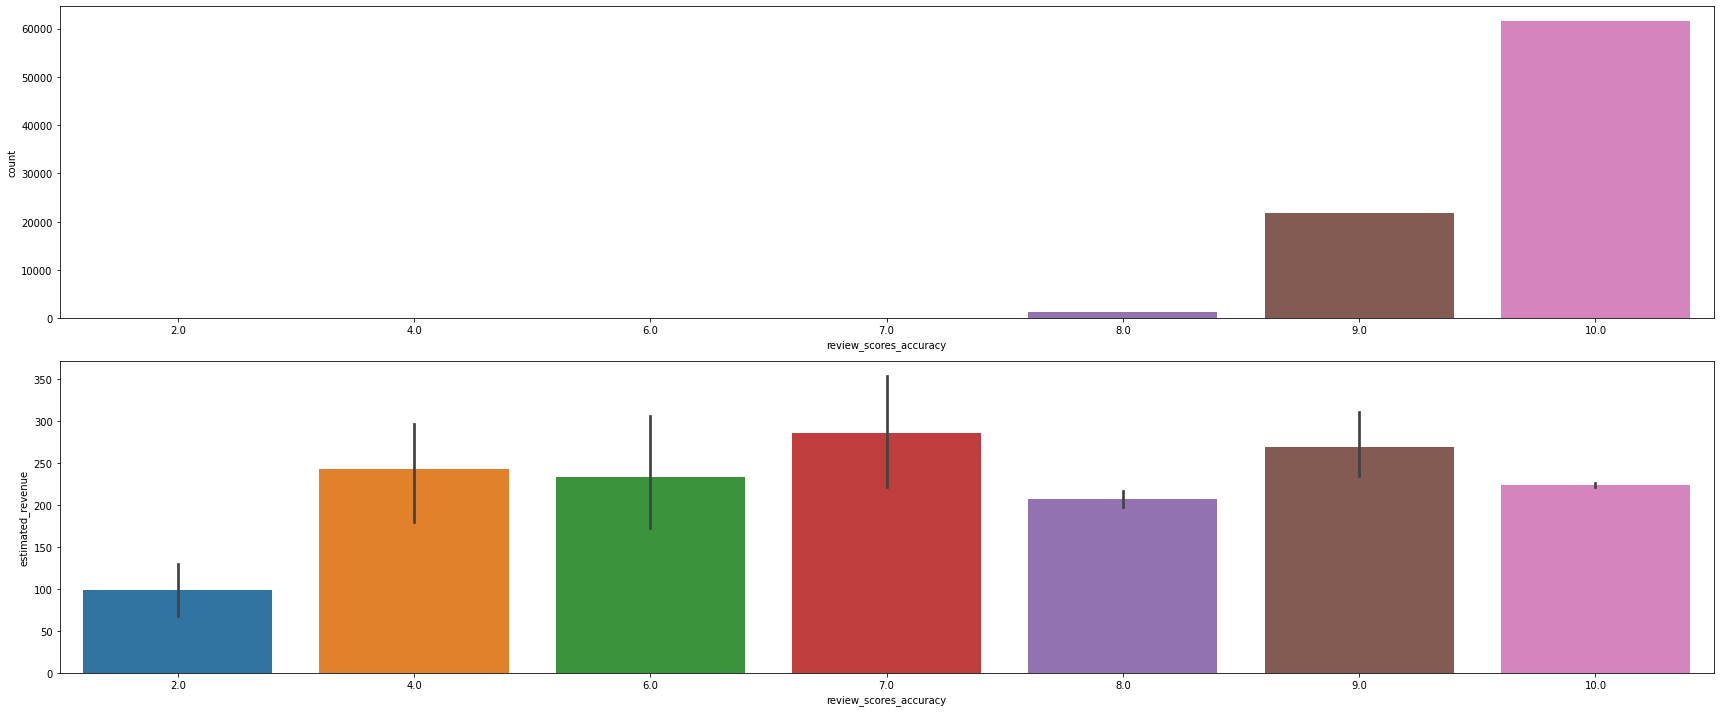

In [301]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(24,10))
sns.countplot(x='review_scores_accuracy',data=listings,ax=ax[0])
sns.barplot(x='review_scores_accuracy',y='estimated_revenue',data=listings,ax=ax[1])
plt.tight_layout()

Reviews Data

In [302]:
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del..."
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si..."


In [303]:
series2 = reviews.date.value_counts()

In [304]:
series2

2015-09-21    580
2015-08-07    400
2015-09-07    384
2015-08-10    383
2015-08-31    371
             ... 
2009-10-02      1
2010-10-15      1
2011-04-22      1
2011-03-01      1
2015-11-30      1
Name: date, Length: 1930, dtype: int64

(array([14245., 14610., 14975., 15340., 15706., 16071., 16436., 16801.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

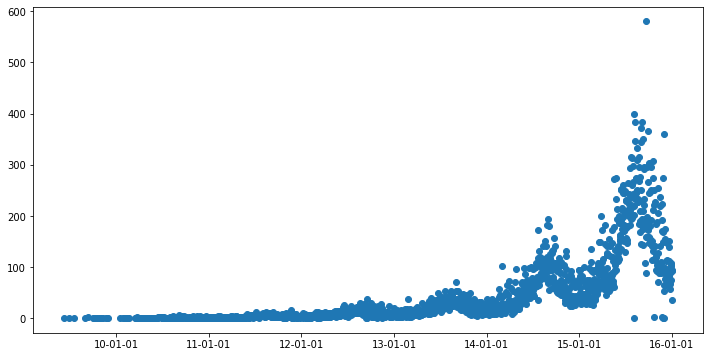

In [305]:
plt.figure(figsize=(12,6))
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%y-%m-%d') # here you can format your datetick labels as desired
plt.plot_date(series2.index,series2.values)
plt.gca().xaxis.set_major_formatter(myFmt)
plt.xticks()

In [306]:
reviews['year'] = reviews['date'].apply(lambda x: x.year)
reviews['month'] = reviews['date'].apply(lambda x: x.month)
reviews['day'] = reviews['date'].apply(lambda x: x.day)

([<matplotlib.axis.XTick at 0x2199abad1c8>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

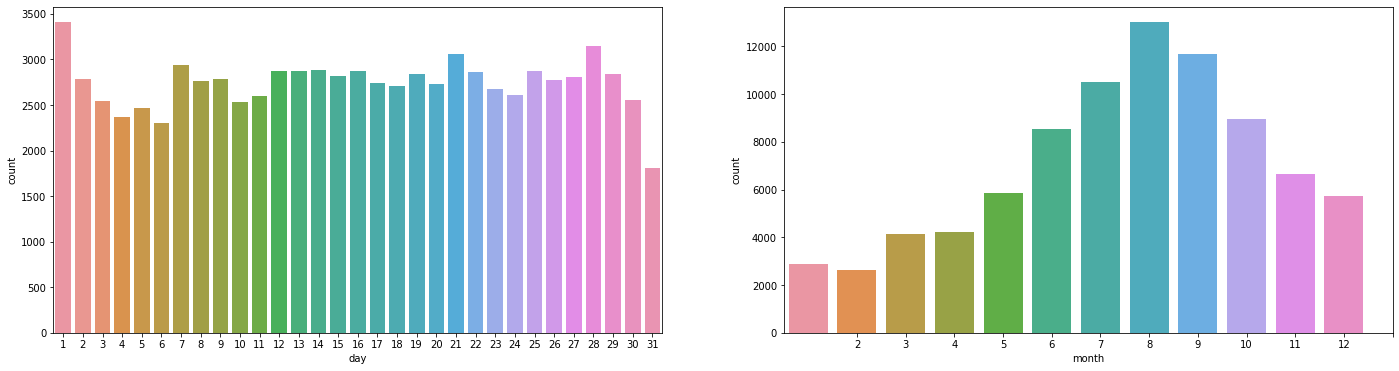

In [307]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(24,6))
sns.countplot(x='day',data=reviews,ax=ax[0])
sns.countplot(x='month',data=reviews,ax=ax[1])
plt.xticks(np.arange(1,13,1))

<AxesSubplot:xlabel='year', ylabel='count'>

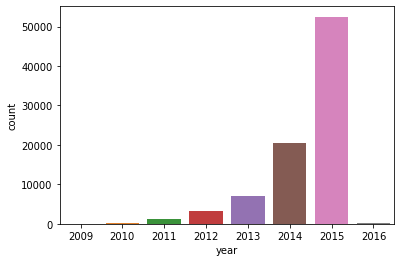

In [308]:
sns.countplot(x='year',data=reviews)

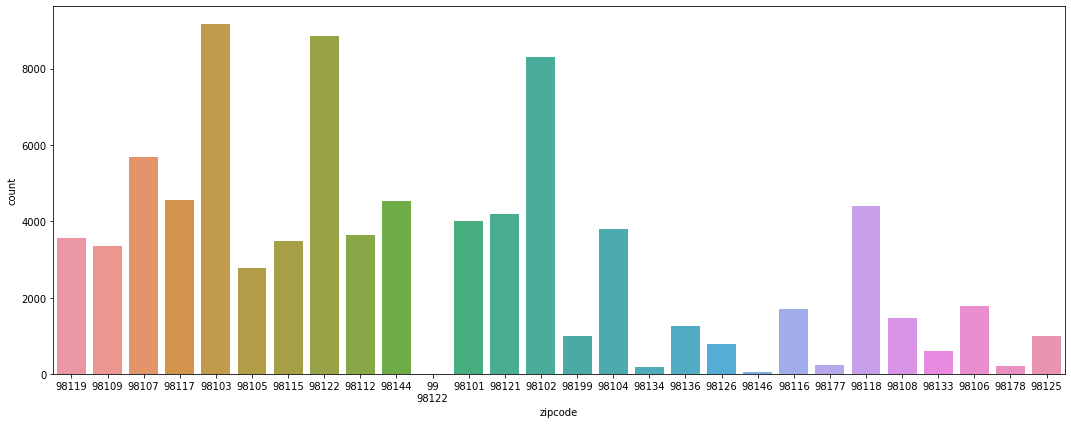

In [309]:
plt.figure(figsize=(15,6))
sns.countplot(x='zipcode',data=listings)
plt.tight_layout()

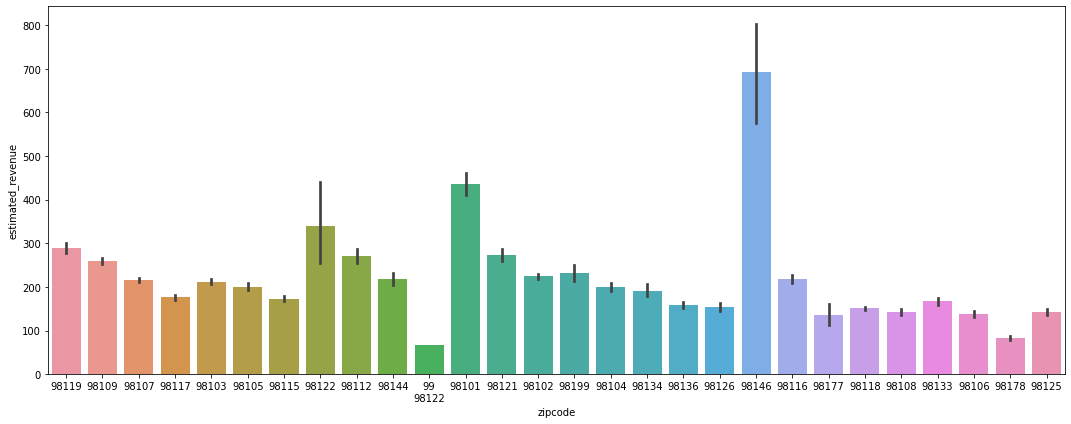

In [310]:
plt.figure(figsize=(15,6))
sns.barplot(x='zipcode',y='estimated_revenue',data=listings,)
plt.tight_layout()

In [311]:
listings['zipcode'].value_counts()

98103        9169
98122        8846
98102        8295
98107        5685
98117        4551
98144        4524
98118        4413
98121        4189
98101        4012
98104        3806
98112        3655
98119        3568
98115        3474
98109        3346
98105        2771
98106        1794
98116        1702
98108        1467
98136        1270
98125        1001
98199         999
98126         802
98133         618
98177         228
98178         209
98134         196
98146          46
99\n98122       1
Name: zipcode, dtype: int64

## Step 3 - Preparation of Data (Missing Values)

In [312]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84849 entries, 0 to 84848
Data columns (total 97 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   listing_id                        84849 non-null  int64         
 1   listing_url                       84849 non-null  object        
 2   name                              84849 non-null  object        
 3   summary                           75850 non-null  object        
 4   space                             81901 non-null  object        
 5   description                       84849 non-null  object        
 6   neighborhood_overview             66434 non-null  object        
 7   notes                             56690 non-null  object        
 8   transit                           70120 non-null  object        
 9   thumbnail_url                     79801 non-null  object        
 10  medium_url                        79801 non-nu

In [313]:
listings.columns[listings.isna().any()]

Index(['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
       'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_neighbourhood', 'neighbourhood', 'zipcode', 'bathrooms',
       'bedrooms', 'square_feet', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'comments'],
      dtype='object')

In [314]:
x = np.sum(listings.isna())

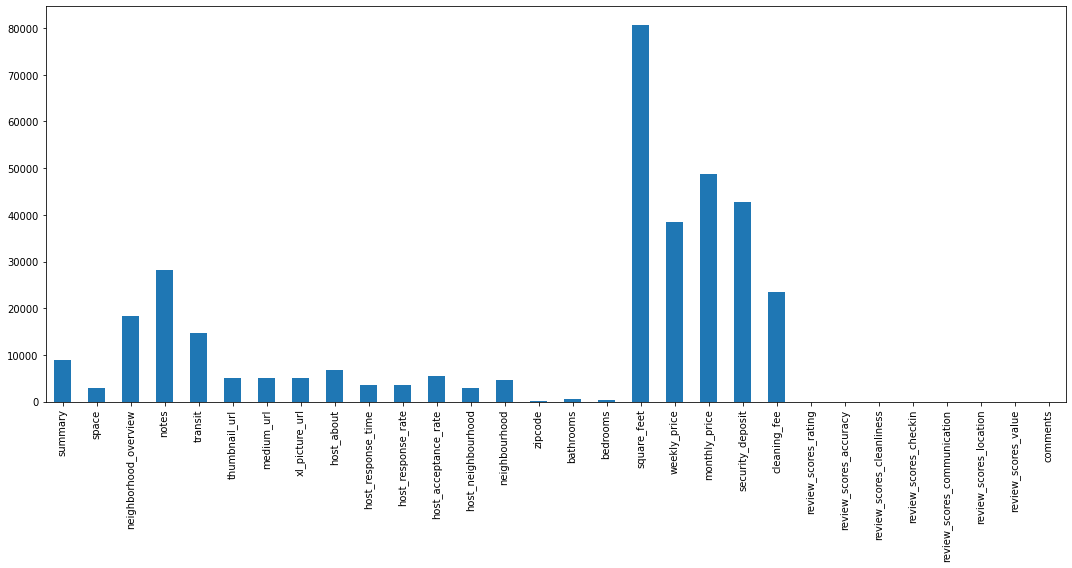

In [315]:
plt.figure(figsize=(15,8))
x[x>0].plot(kind='bar')
plt.tight_layout()

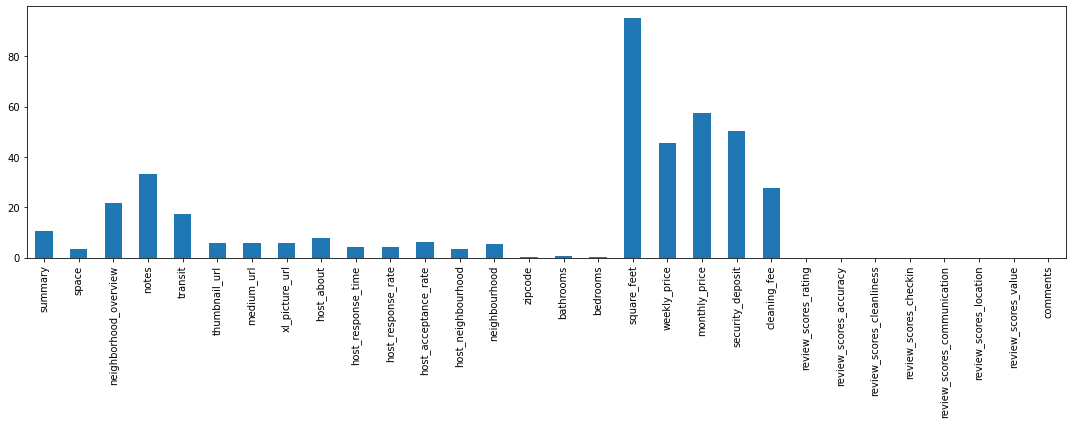

In [316]:
x = x/84849*100
plt.figure(figsize=(15,6))
x[x>0].plot(kind='bar')
plt.tight_layout()

In [317]:
listings.drop(axis=1,labels=['square_feet','weekly_price','monthly_price','security_deposit'],inplace=True)

In [318]:
listings['neighborhood_overview']

0                                                      NaN
1                                                      NaN
2                                                      NaN
3                                                      NaN
4                                                      NaN
                               ...                        
84844    It's taken me a while to figure out why Fremon...
84845    It's taken me a while to figure out why Fremon...
84846    We're located near lots of family fun. Woodlan...
84847    The neighborhood is a quiet oasis that is clos...
84848    The neighborhood is a quiet oasis that is clos...
Name: neighborhood_overview, Length: 84849, dtype: object

In [319]:
x2 = np.sum(listings.isna())
x2 = x2/84849*100

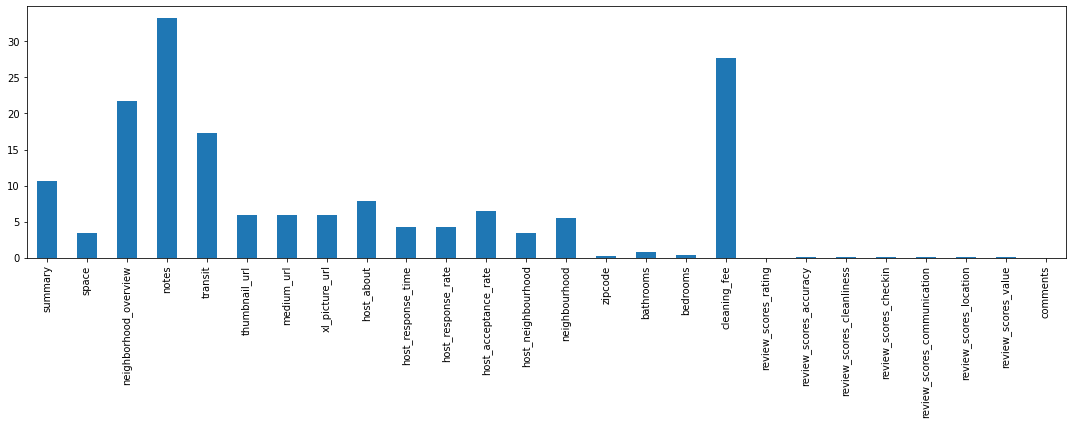

In [320]:
plt.figure(figsize=(15,6))
x2[x2>0].plot(kind='bar')
plt.tight_layout()

In [321]:
listings.drop(axis=1,labels=['summary','notes','medium_url','thumbnail_url','xl_picture_url','listing_url'
                            ,'listing_id','name','space','description','neighborhood_overview','transit','id'
                            ,'comments','reviewer_name','reviewer_id','date','host_since','last_review','first_review','host_id','host_url','picture_url'
                            ,'host_about','host_thumbnail_url','host_picture_url','amenities','host_name','latitude'
                             ,'longitude','street','host_location','host_verifications','calendar_updated'
                            ,'neighbourhood','neighbourhood_cleansed'],inplace=True)

In [322]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84849 entries, 0 to 84848
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   host_response_time                81210 non-null  object 
 1   host_response_rate                81210 non-null  float64
 2   host_acceptance_rate              79409 non-null  float64
 3   host_is_superhost                 84849 non-null  object 
 4   host_neighbourhood                81968 non-null  object 
 5   host_listings_count               84849 non-null  float64
 6   host_total_listings_count         84849 non-null  float64
 7   host_has_profile_pic              84849 non-null  object 
 8   host_identity_verified            84849 non-null  object 
 9   neighbourhood_group_cleansed      84849 non-null  object 
 10  city                              84849 non-null  object 
 11  zipcode                           84637 non-null  object 
 12  is_l

In [323]:
listings['zipcode'].value_counts()

98103        9169
98122        8846
98102        8295
98107        5685
98117        4551
98144        4524
98118        4413
98121        4189
98101        4012
98104        3806
98112        3655
98119        3568
98115        3474
98109        3346
98105        2771
98106        1794
98116        1702
98108        1467
98136        1270
98125        1001
98199         999
98126         802
98133         618
98177         228
98178         209
98134         196
98146          46
99\n98122       1
Name: zipcode, dtype: int64

In [324]:
indexNames = listings[ listings['zipcode'] == '99\n98122' ].index

In [325]:
listings.drop(indexNames , inplace=True)

In [326]:
np.sum(listings['zipcode'].isna())

212

In [327]:
listings['zipcode'].value_counts()

98103    9169
98122    8846
98102    8295
98107    5685
98117    4551
98144    4524
98118    4413
98121    4189
98101    4012
98104    3806
98112    3655
98119    3568
98115    3474
98109    3346
98105    2771
98106    1794
98116    1702
98108    1467
98136    1270
98125    1001
98199     999
98126     802
98133     618
98177     228
98178     209
98134     196
98146      46
Name: zipcode, dtype: int64

In [328]:
x3 = np.sum(listings.isna())
x3 = x3/84849*100

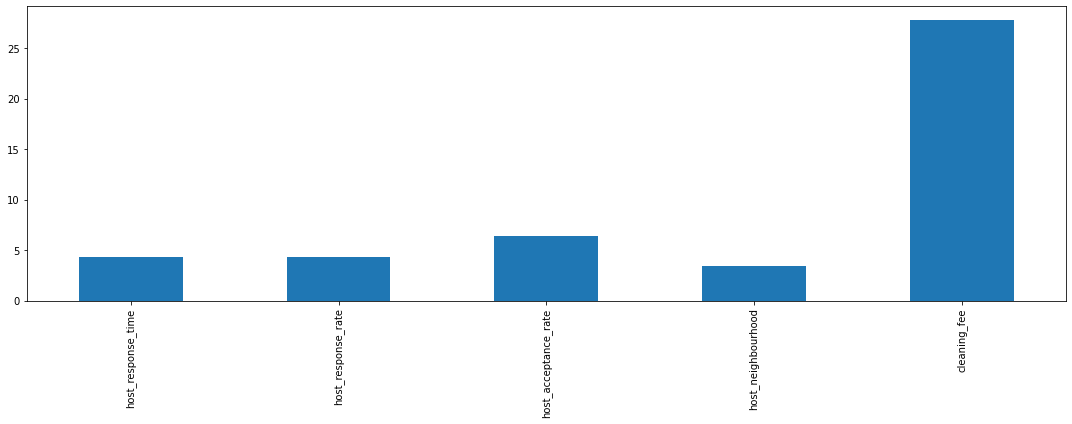

In [329]:
plt.figure(figsize=(15,6))
x3[x3>1].plot(kind='bar')
plt.tight_layout()

In [330]:
listings['cleaning_fee'].value_counts()

25.0     6440
50.0     6139
10.0     5241
60.0     4280
30.0     4110
         ... 
230.0       1
134.0       1
165.0       1
117.0       1
185.0       1
Name: cleaning_fee, Length: 115, dtype: int64

In [331]:
listings['cleaning_fee'].mean()

48.05954982873919

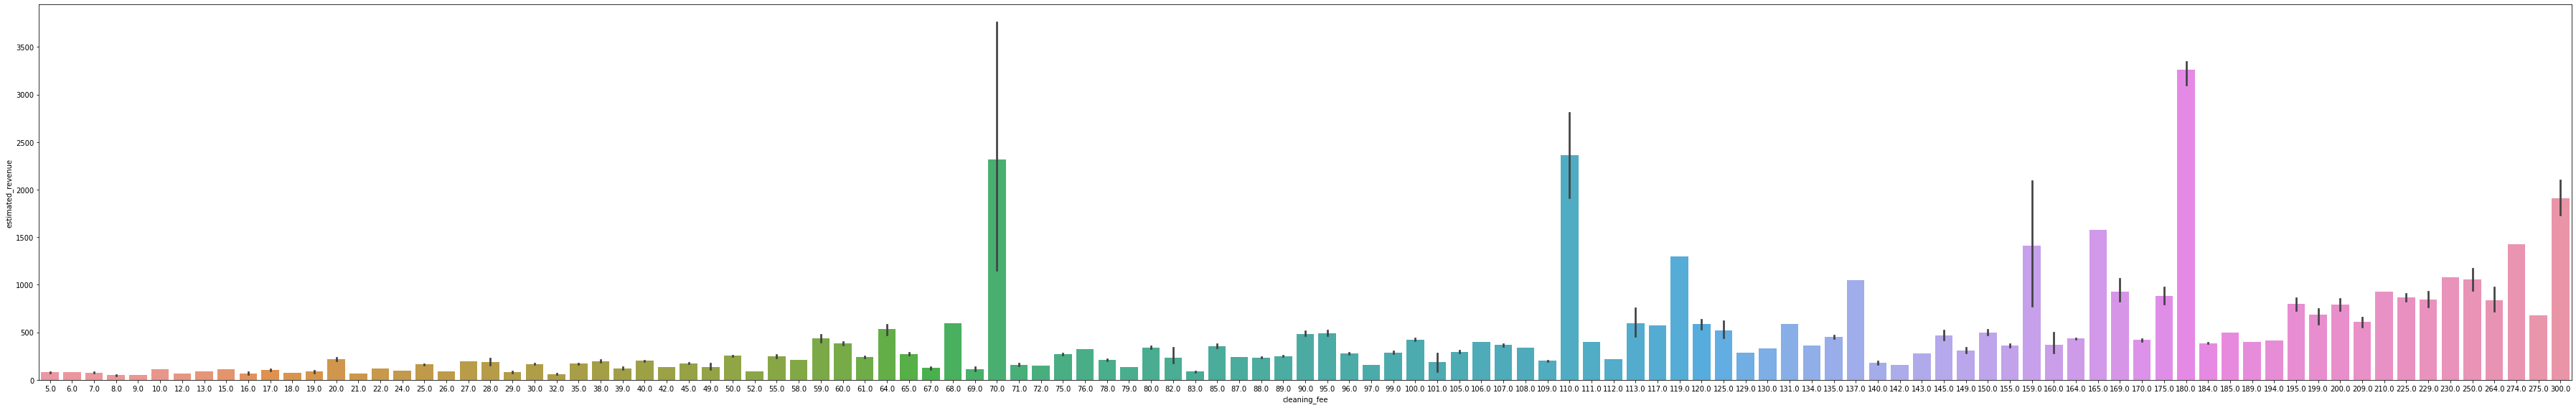

In [332]:
plt.figure(figsize=(50,8))
sns.barplot(y='estimated_revenue',x='cleaning_fee',data=listings)
plt.tight_layout()

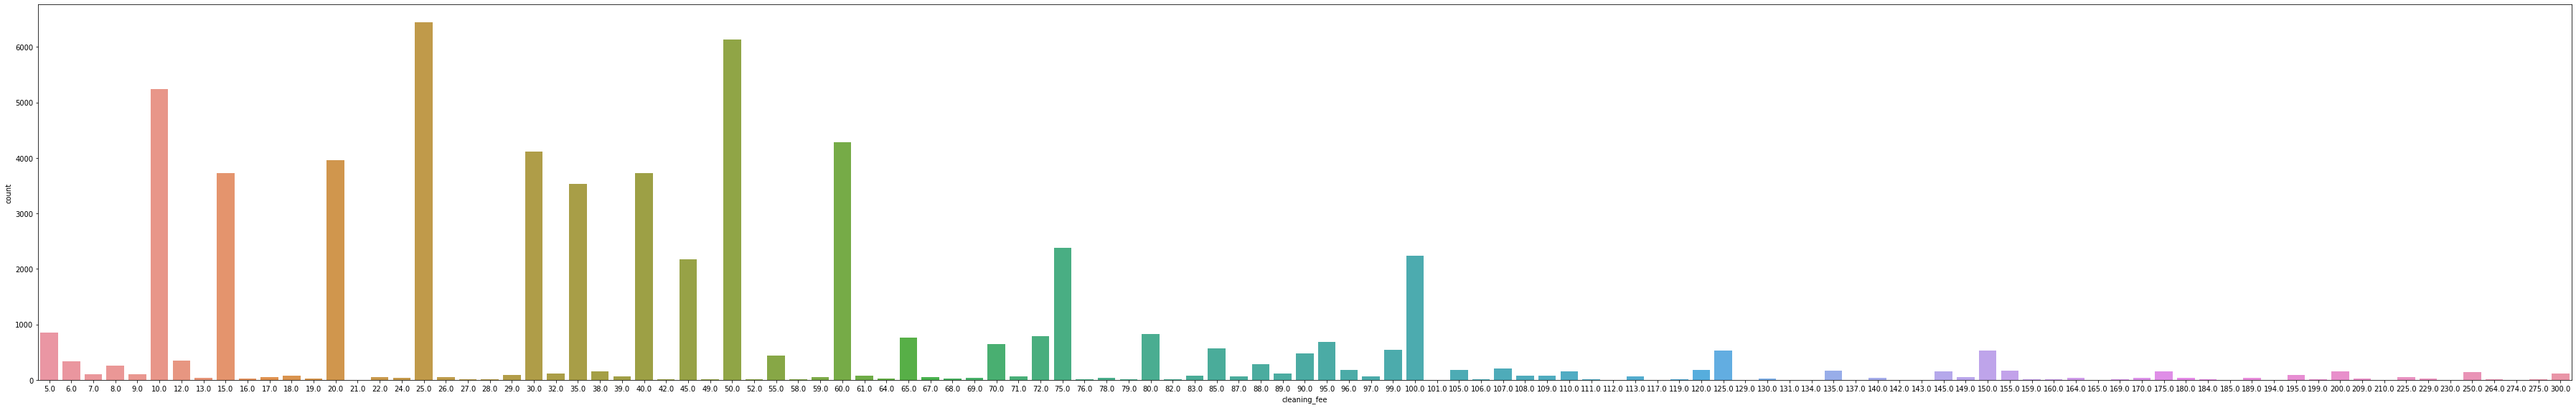

In [333]:
plt.figure(figsize=(50,8))
sns.countplot(x='cleaning_fee',data=listings)
plt.tight_layout()

In [334]:
listings['host_response_time'].value_counts()

within an hour        48870
within a few hours    24050
within a day           7846
a few days or more      443
Name: host_response_time, dtype: int64

In [335]:
listings['host_acceptance_rate'].value_counts()

100.0    79402
0.0          6
Name: host_acceptance_rate, dtype: int64

In [336]:
listings['host_response_rate'].value_counts()

100.0    63557
90.0      4503
94.0      1286
80.0      1235
99.0      1165
86.0       992
93.0       787
75.0       690
97.0       688
96.0       635
95.0       595
70.0       580
98.0       572
88.0       529
89.0       423
50.0       399
83.0       361
92.0       359
67.0       333
60.0       294
71.0       156
33.0       154
43.0       148
91.0       132
40.0       120
63.0       118
53.0        96
78.0        92
82.0        45
69.0        39
76.0        30
81.0        29
57.0        18
87.0        10
25.0         8
64.0         7
58.0         7
31.0         7
17.0         3
56.0         2
30.0         2
65.0         2
38.0         1
Name: host_response_rate, dtype: int64

In [337]:
x['cleaning_fee']

27.742224422208867

In [338]:
listings['cleaning_fee'].value_counts()

25.0     6440
50.0     6139
10.0     5241
60.0     4280
30.0     4110
         ... 
230.0       1
134.0       1
165.0       1
117.0       1
185.0       1
Name: cleaning_fee, Length: 115, dtype: int64

In [339]:
np.mean(listings['cleaning_fee'].value_counts().index)

101.6

In [340]:
listings.columns[listings.nunique() == 0]

Index([], dtype='object')

In [341]:
len(listings.columns[listings.nunique() < 3818])

57

In [342]:
listings['instant_bookable'].value_counts()

f    65302
t    19546
Name: instant_bookable, dtype: int64

In [343]:
listings.isna()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,...,day,host_since_year,host_since_month,host_since_day,first_review_year,first_review_month,first_review_day,last_review_year,last_review_month,last_review_day
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84844,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84845,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84846,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84847,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [344]:
listings.isnull()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,...,day,host_since_year,host_since_month,host_since_day,first_review_year,first_review_month,first_review_day,last_review_year,last_review_month,last_review_day
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84844,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84845,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84846,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84847,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Now let us Drop the rows that have NaN Values in Particular Columns. Columns I choose are basically all related to Review because it is going to be the Feature for which we are going to create Predictve Model

In [345]:
listings.dropna(subset=['zipcode','cleaning_fee','host_neighbourhood'],inplace=True)

In [346]:
listings['zipcode'] = listings['zipcode'].astype(int)

In [347]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59267 entries, 207 to 84848
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   host_response_time                56746 non-null  object 
 1   host_response_rate                56746 non-null  float64
 2   host_acceptance_rate              55480 non-null  float64
 3   host_is_superhost                 59267 non-null  object 
 4   host_neighbourhood                59267 non-null  object 
 5   host_listings_count               59267 non-null  float64
 6   host_total_listings_count         59267 non-null  float64
 7   host_has_profile_pic              59267 non-null  object 
 8   host_identity_verified            59267 non-null  object 
 9   neighbourhood_group_cleansed      59267 non-null  object 
 10  city                              59267 non-null  object 
 11  zipcode                           59267 non-null  int32  
 12  is

In [348]:
np.sum(listings.isna())

host_response_time                  2521
host_response_rate                  2521
host_acceptance_rate                3787
host_is_superhost                      0
host_neighbourhood                     0
host_listings_count                    0
host_total_listings_count              0
host_has_profile_pic                   0
host_identity_verified                 0
neighbourhood_group_cleansed           0
city                                   0
zipcode                                0
is_location_exact                      0
property_type                          0
room_type                              0
accommodates                           0
bathrooms                            331
bedrooms                             192
beds                                   0
bed_type                               0
price                                  0
cleaning_fee                           0
guests_included                        0
extra_people                           0
minimum_nights  

In [349]:
listings.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,...,day,host_since_year,host_since_month,host_since_day,first_review_year,first_review_month,first_review_day,last_review_year,last_review_month,last_review_day
207,within an hour,98.0,100.0,t,Queen Anne,6.0,6.0,t,t,Queen Anne,...,19,2013,2,21,2013,8,19,2015,12,29
208,within an hour,98.0,100.0,t,Queen Anne,6.0,6.0,t,t,Queen Anne,...,19,2013,2,21,2013,8,19,2015,12,29
209,within an hour,98.0,100.0,t,Queen Anne,6.0,6.0,t,t,Queen Anne,...,1,2013,2,21,2013,8,19,2015,12,29
210,within an hour,98.0,100.0,t,Queen Anne,6.0,6.0,t,t,Queen Anne,...,1,2013,2,21,2013,8,19,2015,12,29
211,within an hour,98.0,100.0,t,Queen Anne,6.0,6.0,t,t,Queen Anne,...,10,2013,2,21,2013,8,19,2015,12,29


In [350]:
X = listings.loc[:, ~listings.columns.isin(['estimated_revenue'])].values

In [351]:
X2 = X

In [352]:
X

array([['within an hour', 98.0, 100.0, ..., 2015, 12, 29],
       ['within an hour', 98.0, 100.0, ..., 2015, 12, 29],
       ['within an hour', 98.0, 100.0, ..., 2015, 12, 29],
       ...,
       ['within a few hours', 99.0, 100.0, ..., 2015, 9, 27],
       ['within an hour', 100.0, 100.0, ..., 2015, 12, 24],
       ['within an hour', 100.0, 100.0, ..., 2015, 12, 24]], dtype=object)

In [353]:
y = listings.loc[:,'estimated_revenue'].values
y

array([ 300.,  300.,  300., ..., 1077.,  158.,  158.])

In [354]:
listings.loc[:, ~listings.columns.isin(['estimated_revenue'])].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59267 entries, 207 to 84848
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   host_response_time                56746 non-null  object 
 1   host_response_rate                56746 non-null  float64
 2   host_acceptance_rate              55480 non-null  float64
 3   host_is_superhost                 59267 non-null  object 
 4   host_neighbourhood                59267 non-null  object 
 5   host_listings_count               59267 non-null  float64
 6   host_total_listings_count         59267 non-null  float64
 7   host_has_profile_pic              59267 non-null  object 
 8   host_identity_verified            59267 non-null  object 
 9   neighbourhood_group_cleansed      59267 non-null  object 
 10  city                              59267 non-null  object 
 11  zipcode                           59267 non-null  int32  
 12  is

In [355]:
X2

array([['within an hour', 98.0, 100.0, ..., 2015, 12, 29],
       ['within an hour', 98.0, 100.0, ..., 2015, 12, 29],
       ['within an hour', 98.0, 100.0, ..., 2015, 12, 29],
       ...,
       ['within a few hours', 99.0, 100.0, ..., 2015, 9, 27],
       ['within an hour', 100.0, 100.0, ..., 2015, 12, 24],
       ['within an hour', 100.0, 100.0, ..., 2015, 12, 24]], dtype=object)

In [356]:
listings.fillna(value={'host_response_rate':97,'host_acceptance_rate':100,'review_scores_rating':95
                      ,'review_scores_accuracy':listings['review_scores_accuracy'].mode()[0],
                       'review_scores_checkin':listings['review_scores_checkin'].mode()[0],
                       'review_scores_cleanliness':listings['review_scores_cleanliness'].mode()[0],
                      'review_scores_location':listings['review_scores_location'].mode()[0],
                      'review_scores_value':listings['review_scores_value'].mode()[0],
                      'bedrooms':listings['bedrooms'].mode()[0],
                      'bathrooms':listings['bathrooms'].mode()[0],
                      'review_scores_communication':listings['review_scores_communication'].mode()[0]
                      },inplace=True)

In [357]:
np.sum(listings.isna())

host_response_time                  2521
host_response_rate                     0
host_acceptance_rate                   0
host_is_superhost                      0
host_neighbourhood                     0
host_listings_count                    0
host_total_listings_count              0
host_has_profile_pic                   0
host_identity_verified                 0
neighbourhood_group_cleansed           0
city                                   0
zipcode                                0
is_location_exact                      0
property_type                          0
room_type                              0
accommodates                           0
bathrooms                              0
bedrooms                               0
beds                                   0
bed_type                               0
price                                  0
cleaning_fee                           0
guests_included                        0
extra_people                           0
minimum_nights  

In [358]:
listings['host_response_rate'][listings['host_response_time'].isna()].value_counts()

97.0    2521
Name: host_response_rate, dtype: int64

In [359]:
listings['host_response_time'][listings['host_response_rate'] == 97].value_counts()

within a few hours    497
within an hour         50
Name: host_response_time, dtype: int64

In [360]:
listings.fillna(value={'host_response_time':'within a few hours'},inplace=True)

In [361]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59267 entries, 207 to 84848
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   host_response_time                59267 non-null  object 
 1   host_response_rate                59267 non-null  float64
 2   host_acceptance_rate              59267 non-null  float64
 3   host_is_superhost                 59267 non-null  object 
 4   host_neighbourhood                59267 non-null  object 
 5   host_listings_count               59267 non-null  float64
 6   host_total_listings_count         59267 non-null  float64
 7   host_has_profile_pic              59267 non-null  object 
 8   host_identity_verified            59267 non-null  object 
 9   neighbourhood_group_cleansed      59267 non-null  object 
 10  city                              59267 non-null  object 
 11  zipcode                           59267 non-null  int32  
 12  is

## Step 3 - Building a Model

In [362]:
listings.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,...,day,host_since_year,host_since_month,host_since_day,first_review_year,first_review_month,first_review_day,last_review_year,last_review_month,last_review_day
207,within an hour,98.0,100.0,t,Queen Anne,6.0,6.0,t,t,Queen Anne,...,19,2013,2,21,2013,8,19,2015,12,29
208,within an hour,98.0,100.0,t,Queen Anne,6.0,6.0,t,t,Queen Anne,...,19,2013,2,21,2013,8,19,2015,12,29
209,within an hour,98.0,100.0,t,Queen Anne,6.0,6.0,t,t,Queen Anne,...,1,2013,2,21,2013,8,19,2015,12,29
210,within an hour,98.0,100.0,t,Queen Anne,6.0,6.0,t,t,Queen Anne,...,1,2013,2,21,2013,8,19,2015,12,29
211,within an hour,98.0,100.0,t,Queen Anne,6.0,6.0,t,t,Queen Anne,...,10,2013,2,21,2013,8,19,2015,12,29


In [363]:
X = listings.loc[:, ~listings.columns.isin(['estimated_revenue'])].values

In [364]:
X

array([['within an hour', 98.0, 100.0, ..., 2015, 12, 29],
       ['within an hour', 98.0, 100.0, ..., 2015, 12, 29],
       ['within an hour', 98.0, 100.0, ..., 2015, 12, 29],
       ...,
       ['within a few hours', 99.0, 100.0, ..., 2015, 9, 27],
       ['within an hour', 100.0, 100.0, ..., 2015, 12, 24],
       ['within an hour', 100.0, 100.0, ..., 2015, 12, 24]], dtype=object)

In [365]:
y = listings.loc[:,'estimated_revenue'].values
y

array([ 300.,  300.,  300., ..., 1077.,  158.,  158.])

In [366]:
np.sum(listings == 't')

host_response_time                      0
host_response_rate                      0
host_acceptance_rate                    0
host_is_superhost                   23121
host_neighbourhood                      0
host_listings_count                     0
host_total_listings_count               0
host_has_profile_pic                59253
host_identity_verified              51147
neighbourhood_group_cleansed            0
city                                    0
zipcode                                 0
is_location_exact                   57354
property_type                           0
room_type                               0
accommodates                            0
bathrooms                               0
bedrooms                                0
beds                                    0
bed_type                                0
price                                   0
cleaning_fee                            0
guests_included                         0
extra_people                      

In [367]:
listings.replace(to_replace={'t':1,'f':0},inplace=True)

In [368]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59267 entries, 207 to 84848
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   host_response_time                59267 non-null  object 
 1   host_response_rate                59267 non-null  float64
 2   host_acceptance_rate              59267 non-null  float64
 3   host_is_superhost                 59267 non-null  int64  
 4   host_neighbourhood                59267 non-null  object 
 5   host_listings_count               59267 non-null  float64
 6   host_total_listings_count         59267 non-null  float64
 7   host_has_profile_pic              59267 non-null  int64  
 8   host_identity_verified            59267 non-null  int64  
 9   neighbourhood_group_cleansed      59267 non-null  object 
 10  city                              59267 non-null  object 
 11  zipcode                           59267 non-null  int32  
 12  is

In [395]:
from sklearn.decomposition import IncrementalPCA

In [405]:
pca = IncrementalPCA(n_components=10)

In [373]:
dummy = pd.get_dummies(columns=listings['property_type'],data=listings['property_type'],prefix='property_type'
                      ,prefix_sep='_')

listings = listings.merge(dummy,right_index=True,left_index=True)

listings_dummy = listings['property_type']
listings.drop(axis=1,labels='property_type',inplace=True)

In [374]:
dummy

,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Yurt
207,1,0,0,0,0,0,0,0,0,0,0,0,0,0
208,1,0,0,0,0,0,0,0,0,0,0,0,0,0
209,1,0,0,0,0,0,0,0,0,0,0,0,0,0
210,1,0,0,0,0,0,0,0,0,0,0,0,0,0
211,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84771,1,0,0,0,0,0,0,0,0,0,0,0,0,0
84772,1,0,0,0,0,0,0,0,0,0,0,0,0,0
84846,0,0,0,0,0,0,0,0,0,1,0,0,0,0
84847,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [375]:
listings['zipcode'] = listings['zipcode'].astype(int)

In [376]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59267 entries, 207 to 84848
Data columns (total 70 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   host_response_time                59267 non-null  object 
 1   host_response_rate                59267 non-null  float64
 2   host_acceptance_rate              59267 non-null  float64
 3   host_is_superhost                 59267 non-null  int64  
 4   host_neighbourhood                59267 non-null  object 
 5   host_listings_count               59267 non-null  float64
 6   host_total_listings_count         59267 non-null  float64
 7   host_has_profile_pic              59267 non-null  int64  
 8   host_identity_verified            59267 non-null  int64  
 9   neighbourhood_group_cleansed      59267 non-null  object 
 10  city                              59267 non-null  object 
 11  zipcode                           59267 non-null  int32  
 12  is

In [377]:
dummy = pd.get_dummies(columns=listings['cancellation_policy'],data=listings['cancellation_policy'],prefix='cancellation_policy'
                      ,prefix_sep='_')

listings = listings.merge(dummy,right_index=True,left_index=True)

listings_dummy['cancellation_policy'] = listings['cancellation_policy']
listings.drop(axis=1,labels='cancellation_policy',inplace=True)

In [378]:
dummy = pd.get_dummies(columns=listings['bed_type'],data=listings['bed_type'],prefix='bed_type'
                      ,prefix_sep='_')

listings = listings.merge(dummy,right_index=True,left_index=True)

listings_dummy['bed_type'] = listings['bed_type']
listings.drop(axis=1,labels='bed_type',inplace=True)

In [379]:
dummy = pd.get_dummies(columns=listings['room_type'],data=listings['room_type'],prefix='room_type'
                      ,prefix_sep='_')

listings = listings.merge(dummy,right_index=True,left_index=True)

listings_dummy['room_type'] = listings['room_type']
listings.drop(axis=1,labels='room_type',inplace=True)

In [380]:
dummy = pd.get_dummies(columns=listings['city'],data=listings['city'],prefix='city'
                      ,prefix_sep='_')

listings = listings.merge(dummy,right_index=True,left_index=True)

listings_dummy['city'] = listings['city']
listings.drop(axis=1,labels='city',inplace=True)

In [381]:
dummy = pd.get_dummies(columns=listings['neighbourhood_group_cleansed'],data=listings['neighbourhood_group_cleansed']
                       ,prefix='neighbourhood_group_cleansed',prefix_sep='_')

listings = listings.merge(dummy,right_index=True,left_index=True)

listings_dummy['neighbourhood_group_cleansed'] = listings['neighbourhood_group_cleansed']
listings.drop(axis=1,labels='neighbourhood_group_cleansed',inplace=True)

In [382]:
dummy = pd.get_dummies(columns=listings['host_neighbourhood'],data=listings['host_neighbourhood'],prefix='host_neighbourhood'
                      ,prefix_sep='_')

listings = listings.merge(dummy,right_index=True,left_index=True)

listings_dummy['host_neighbourhood'] = listings['host_neighbourhood']
listings.drop(axis=1,labels='host_neighbourhood',inplace=True)

In [383]:
dummy = pd.get_dummies(columns=listings['host_response_time'],data=listings['host_response_time'],prefix='host_response_time'
                      ,prefix_sep='_')

listings = listings.merge(dummy,right_index=True,left_index=True)

listings_dummy['host_response_time'] = listings['host_response_time']
listings.drop(axis=1,labels='host_response_time',inplace=True)

In [384]:
listings.columns[np.sum(listings.isna()) > 0]

Index([], dtype='object')

In [385]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59267 entries, 207 to 84848
Columns: 191 entries, host_response_rate to host_response_time_within an hour
dtypes: float64(19), int32(1), int64(29), uint8(142)
memory usage: 32.9 MB


In [386]:
listings

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,zipcode,is_location_exact,accommodates,...,host_neighbourhood_Waianae Coast,host_neighbourhood_Wallingford,host_neighbourhood_Wedgewood,host_neighbourhood_Westlake,host_neighbourhood_Windermere,host_neighbourhood_Yesler Terrace,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
207,98.0,100.0,1,6.0,6.0,1,1,98119,1,4,...,0,0,0,0,0,0,0,0,0,1
208,98.0,100.0,1,6.0,6.0,1,1,98119,1,4,...,0,0,0,0,0,0,0,0,0,1
209,98.0,100.0,1,6.0,6.0,1,1,98119,1,4,...,0,0,0,0,0,0,0,0,0,1
210,98.0,100.0,1,6.0,6.0,1,1,98119,1,4,...,0,0,0,0,0,0,0,0,0,1
211,98.0,100.0,1,6.0,6.0,1,1,98119,1,4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84771,100.0,100.0,0,1.0,1.0,1,1,98103,1,3,...,0,0,0,0,0,0,0,0,1,0
84772,100.0,100.0,0,1.0,1.0,1,1,98103,1,3,...,0,0,0,0,0,0,0,0,1,0
84846,99.0,100.0,0,354.0,354.0,1,1,98107,1,6,...,0,0,0,0,0,0,0,0,1,0
84847,100.0,100.0,0,1.0,1.0,1,1,98102,1,4,...,0,0,0,0,0,0,0,0,0,1


In [387]:
listings_dummy

207                                                                     Apartment
208                                                                     Apartment
209                                                                     Apartment
210                                                                     Apartment
211                                                                     Apartment
                                                      ...                        
room_type                       207      Entire home/apt
208      Entire home/...
city                            207      Seattle
208      Seattle
209      Sea...
neighbourhood_group_cleansed    207               Queen Anne
208              ...
host_neighbourhood              207       Queen Anne
208       Queen Anne
209 ...
host_response_time              207          within an hour
208          withi...
Name: property_type, Length: 59274, dtype: object

In [388]:
X = listings.loc[:, ~listings.columns.isin(['estimated_revenue'])].values
X

array([[ 98., 100.,   1., ...,   0.,   0.,   1.],
       [ 98., 100.,   1., ...,   0.,   0.,   1.],
       [ 98., 100.,   1., ...,   0.,   0.,   1.],
       ...,
       [ 99., 100.,   0., ...,   0.,   1.,   0.],
       [100., 100.,   0., ...,   0.,   0.,   1.],
       [100., 100.,   0., ...,   0.,   0.,   1.]])

In [389]:
y = listings.loc[:,'estimated_revenue'].values
y

array([ 300.,  300.,  300., ..., 1077.,  158.,  158.])

In [399]:
print(len(X))
print(len(y))

59267
59267


In [406]:
X_pca = pca.fit_transform(X)

In [407]:
len(X_pca)

59267

In [408]:
X_pca

array([[-4.77627072e+02,  2.24362577e+01,  5.04207800e+01, ...,
        -1.24434303e+01,  4.61290937e+00, -4.10006720e-01],
       [-4.77627072e+02,  2.24362577e+01,  5.04207800e+01, ...,
        -1.24434303e+01,  4.61290937e+00, -4.10006720e-01],
       [-4.77626227e+02,  2.24345539e+01,  5.04071462e+01, ...,
        -1.26353463e+01,  3.45161356e+00, -2.88120036e-01],
       ...,
       [ 5.57171613e+02, -2.46271010e+02,  2.83430077e+02, ...,
         3.00736520e+01,  4.32579333e+01, -4.60305199e+00],
       [-5.38296996e+02,  8.21387234e+00,  2.44313572e+01, ...,
         1.18208478e+01, -1.69951848e+01,  6.12772700e-01],
       [-5.38297043e+02,  8.21361756e+00,  2.44383354e+01, ...,
         1.18832548e+01, -1.66136188e+01,  5.69003412e-01]])

In [409]:
len(X_pca[0])

10

In [410]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca,y,test_size=0.2,random_state=42)

from sklearn.feature_selection import SelectFpr,chi2

feature_selector = SelectFpr(chi2,alpha=0.01)

feature_selector.fit(X_train,y_train)

X_train = feature_selector.transform(X_train)

X_test = feature_selector.transform(X_test)

In [415]:
X_train.shape

(47413, 10)

In [416]:
from sklearn.linear_model import LinearRegression

In [417]:
regressor = LinearRegression(normalize=True)

In [418]:
regressor.fit(X_train, y_train)

LinearRegression(normalize=True)

In [419]:
y_pred = regressor.predict(X_test)

In [429]:
from sklearn.metrics import r2_score,mean_absolute_error

In [421]:
r2_score(y_test,y_pred)

0.9925257386764101

In [422]:
y_pred = regressor.predict(X_train)

In [423]:
r2_score(y_train,y_pred)

0.9907726434363888

In [430]:
mean_absolute_error(y_train, y_pred)

61.86347434278561

In [424]:
from sklearn.feature_selection import f_regression

In [425]:
features = f_regression(X_pca, y)

In [426]:
features[1] <0.1

array([ True, False,  True,  True,  True, False,  True,  True,  True,
        True])

In [427]:
len(features[1])

10

In [428]:
np.sum(features[1] <0.1)

8